## I. Import des bibliothèques

In [1]:
import pandas as pd
from math import floor
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as color
import matplotlib.cm as cm
import numpy as np
import sys

## II. Préprocessing des données

### II.a Nettoyage des données

In [2]:
df1 = pd.read_csv('base_emission_dioxdb_20200731.csv', sep=';')
df_final = df1[-(df1.isnull()["emission amount  (=concentration as reported)"])]
df_final[["emission amount  (=concentration as reported)"]] = df_final[["emission amount  (=concentration as reported)"]].apply(lambda x: x.str.replace(',','.'))
df_final["emission amount  (=concentration as reported)"] = df_final["emission amount  (=concentration as reported)"].astype(float)

C:\Users\dsamy\Anaconda3\envs\ineris\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dsamy\Anaconda3\envs\ineris\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [3]:
file_remove = "MSW-LAST/MB-WW/MSWNHWHE.XLS"
run_id_remove = ["1-O-M23-1", "2-O-M23-1"]
aux = df_final[-((df_final["run id"] == run_id_remove[0]) | (df_final["run id"] == run_id_remove[1]))]
aux = aux.fillna("Unknown")

### II.b Mise en forme des données

In [4]:
list_columns_id = ["file", "test date", "run id", "source category", "source subcategory"]

substances = ['2378-TCDD', '12378-PCDD', '123478-HxCDD', '123678-HxCDD',
       '123789-HxCDD', '1234678-HpCDD', 'OCDD', '2378-TCDF', '12378-PeCDF',
       '23478-PeCDF', '123478-HxCDF', '123678-HxCDF', '234678-HxCDF',
       '123789-HxCDF', '1234678-HpCDF', '1234789-HpCDF', 'OCDF']

total_homologue = ['Total TCDD', 'Total TCDF',
         'Total PCDD', 'Total PeCDF',
         'Total HxCDD', 'Total HxCDF',
         'Total HpCDD', 'Total HpCDF',
         'OCDD', 'OCDF']

total = ['Total DIOXINE', 'Total FURANE', 'Total DIOXINE FURANE']

In [5]:
table_final = aux.pivot_table(index=list_columns_id, columns="substance", values="emission amount  (=concentration as reported)", aggfunc='sum')
table_final = table_final.fillna(0)
table_final["total sub 2378"] = 0
for sub in substances:
    table_final["total sub 2378"] += table_final[sub]

### II.c Récupération des données EPA bruit de fond

In [6]:
df = pd.read_csv('Classeur1.csv', sep=';')

#Clean the dataframe
def clean(x):
    if not pd.isna(x):
        s=x.replace(',','.')
        s=float(s)
        return(s)

COLUMNS_NOT_TO_CLEAN = ['Site', 'Type', 'Dates', 'Site #', 'Moment', 'Year', 'Season']
for i in df.columns:
    if i not in COLUMNS_NOT_TO_CLEAN:
        df[i]=df[i].apply(clean)

In [7]:
# df=df[df['TOTAL']<10000]

PCDDF = ['Site', 'Type', 'Site #', 'Moment', 'Dates', 'Year', 'Season',
       '2378-TCDD', '12378-PCDD', '123478-HxCDD', '123678-HxCDD',
       '123789-HxCDD', '1234678-HpCDD', 'OCDD', '2378-TCDF', '12378-PeCDF',
       '23478-PeCDF', '123478-HxCDF', '123678-HxCDF', '234678-HxCDF',
       '123789-HxCDF', '1234678-HpCDF', '1234789-HpCDF', 'OCDF',
       'Total TCDF', 'Total TCDD', 'Total PeCDF', 'Total PeCDD', 'Total HxCDF',
       'Total HxCDD', 'Total HpCDF', 'Total HpCDD']
#        'DF- TEQ', 'PCB - TEQ',
#        'TOTAL']
df=df[PCDDF]
PCDD = ['2378-TCDD', '12378-PCDD', '123478-HxCDD', '123678-HxCDD',
       '123789-HxCDD', '1234678-HpCDD', 'OCDD']

PCDF = ['2378-TCDF', '12378-PeCDF',
       '23478-PeCDF', '123478-HxCDF', '123678-HxCDF', '234678-HxCDF',
       '123789-HxCDF', '1234678-HpCDF', '1234789-HpCDF', 'OCDF']

df['PCDD TOTAL'] = 0
for i in PCDD:
    df['PCDD TOTAL'] = df['PCDD TOTAL'] + df[i]
    

df['PCDF TOTAL'] = 0
for i in PCDF:
    df['PCDF TOTAL'] = df['PCDF TOTAL'] + df[i]
    
df['TOTAL'] = df['PCDD TOTAL'] + df['PCDF TOTAL']
# df = df.fillna(0)

In [8]:
df['Total_TCDD'] = df['2378-TCDD']
df['Total_PeCDD'] = df['12378-PCDD']
df['Total_HxCDD'] = df['123478-HxCDD'] + df['123678-HxCDD'] + df['123789-HxCDD']
df['Total_HpCDD'] = df['1234678-HpCDD']
df['Total_OCDD'] = df['OCDD']
df['Total_TCDF'] = df['2378-TCDF']
df['Total_PeCDF'] = df['12378-PeCDF'] + df['23478-PeCDF']
df['Total_HxCDF'] = df['123478-HxCDF'] + df['123678-HxCDF'] + df['234678-HxCDF'] + df['123789-HxCDF']
df['Total_HpCDF'] = df['1234678-HpCDF'] + df['1234789-HpCDF']
df['Total_OCDF'] = df['OCDF']

## III. Analyse des sources d'émission

### III.1 Analyse des "source category"

In [9]:
categories = pd.unique(aux["source category"])
echantillons = table_final.index

In [10]:
counter_list = []
for cate in categories:
    value = 0
    for sample in echantillons:
        if(cate in sample):
            value += 1
    counter_list.append(value)

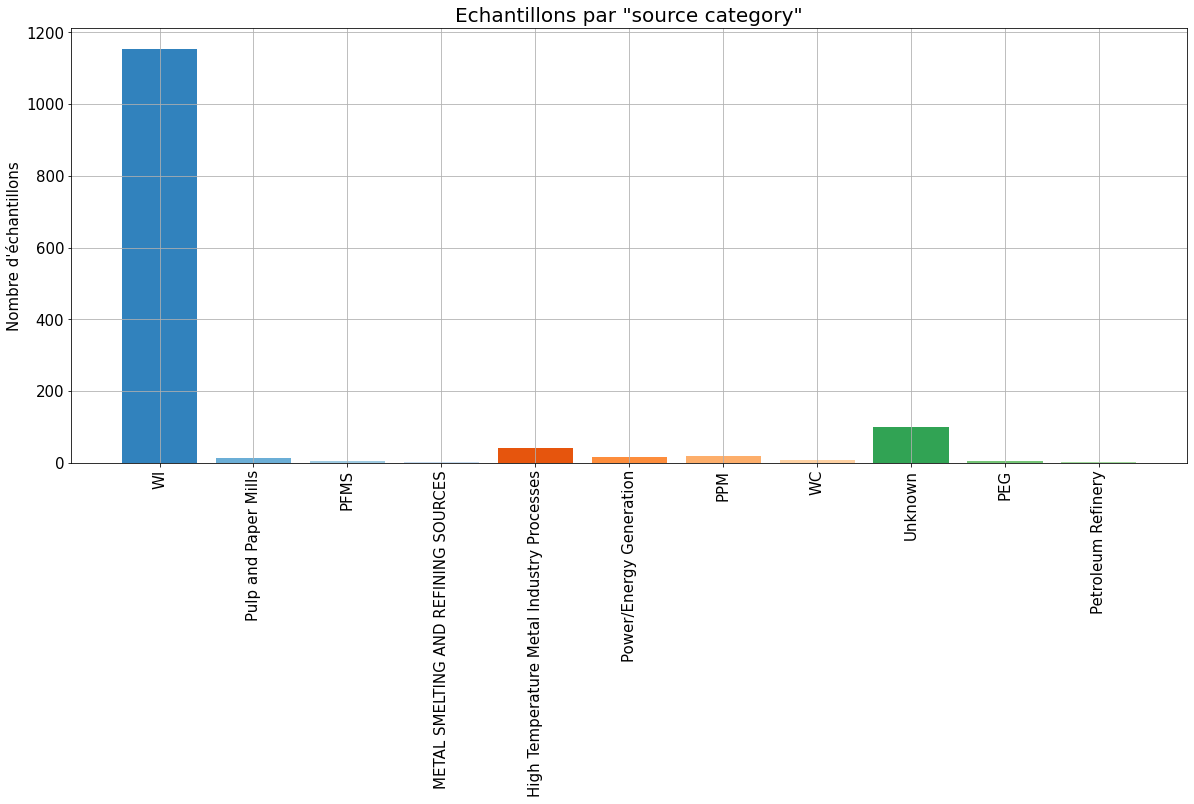

In [11]:
plt.rcParams["figure.figsize"] = (20,8)
plt.bar(categories, counter_list, color=plt.cm.tab20c.colors)
plt.title(f"Echantillons par \"source category\"",fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Nombre d\'échantillons",fontsize=15)
plt.xticks(fontsize=15,rotation=90)

plt.grid()
plt.show()

### III.2 Analyse des "source subcategory"

In [12]:
subcategories = pd.unique(aux["source subcategory"])
link_categories = aux[["source category", "source subcategory"]].drop_duplicates()

In [13]:
colors_subcate = []
for subcate in subcategories:
    category = link_categories[link_categories["source subcategory"] == subcate]["source category"].iloc[0]
    indice = list(categories).index(category)
    colors_subcate.append(plt.cm.tab20c.colors[indice])

In [14]:
counter_list = []
for cate in subcategories:
    value = 0
    for sample in echantillons:
        if(cate in sample):
            value += 1
    counter_list.append(value)

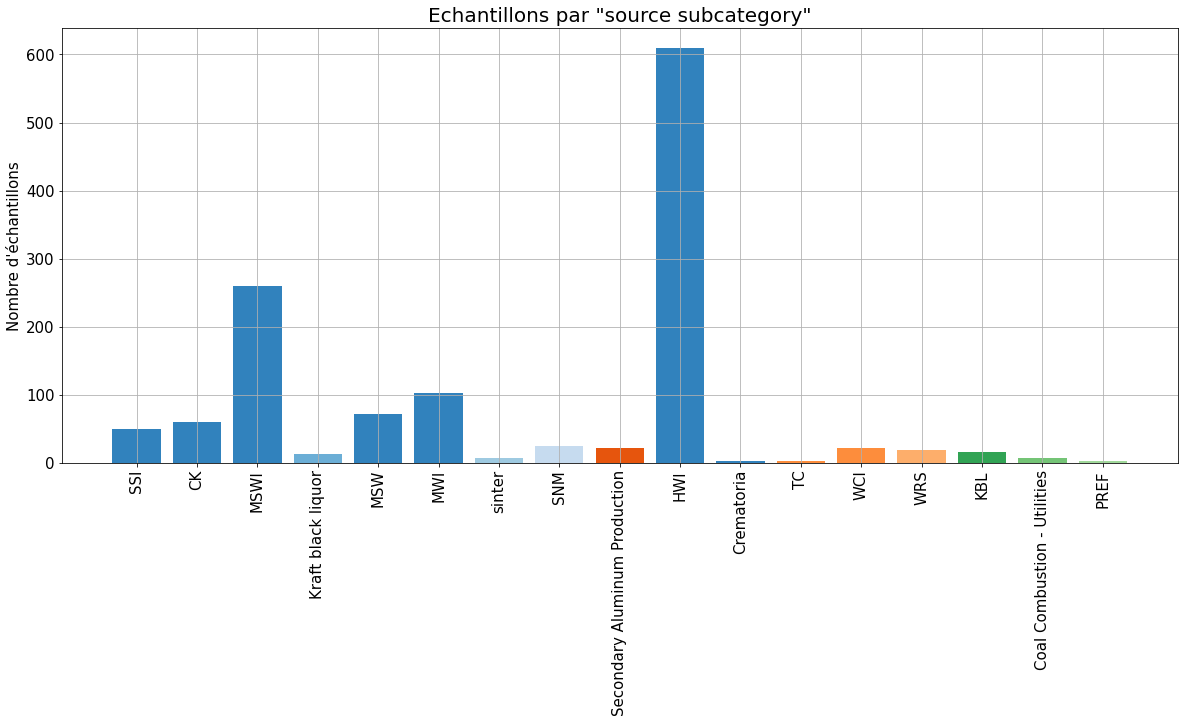

In [15]:
plt.rcParams["figure.figsize"] = (20,8)
plt.bar(subcategories, counter_list, color=colors_subcate)
plt.title(f"Echantillons par \"source subcategory\"",fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Nombre d\'échantillons",fontsize=15)
plt.xticks(fontsize=15,rotation=90)

plt.grid()
plt.show()

## IV. Mise en place des normes

### IV.a Norme A

In [16]:
table_norme_A = table_final[substances]
for sub in substances:
    table_norme_A[sub] = table_norme_A[sub] * 100 / table_final["total sub 2378"]

C:\Users\dsamy\Anaconda3\envs\ineris\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### IV.a.1 Affichange sur un échantillon

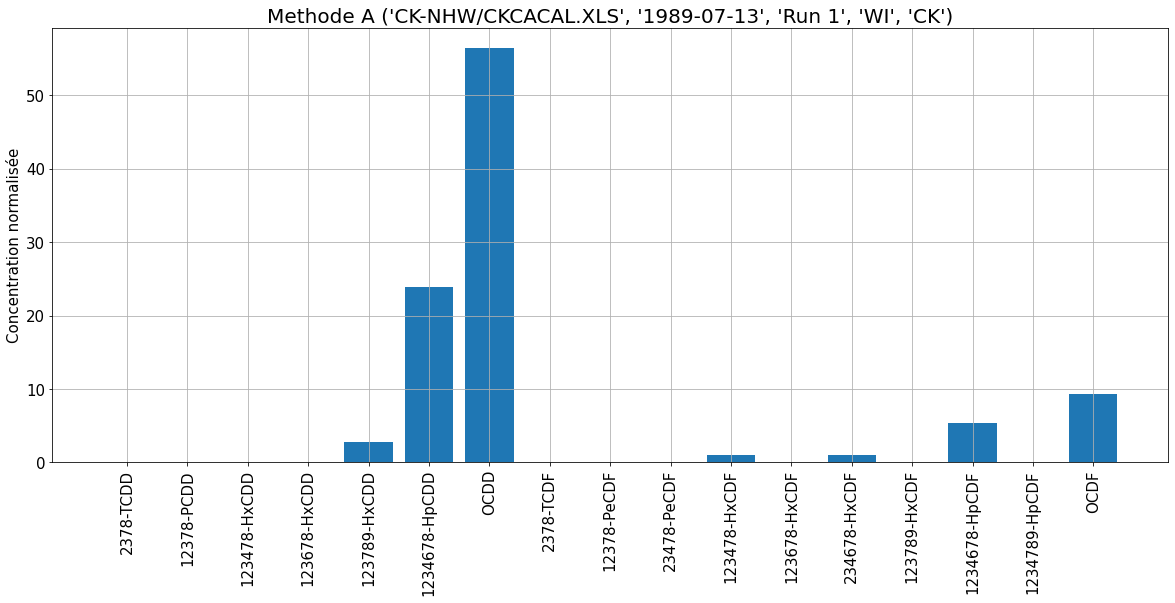

In [17]:
test = echantillons[0]
plt.rcParams["figure.figsize"] = (20,8)
plt.bar(substances, table_norme_A.loc[test].values)
plt.title(f"Methode A " + str(test),fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel('Concentration normalisée',fontsize=15)
plt.xticks(fontsize=15,rotation=90)

plt.grid()
plt.show()

### IV.a.2 Affichage par "source category"

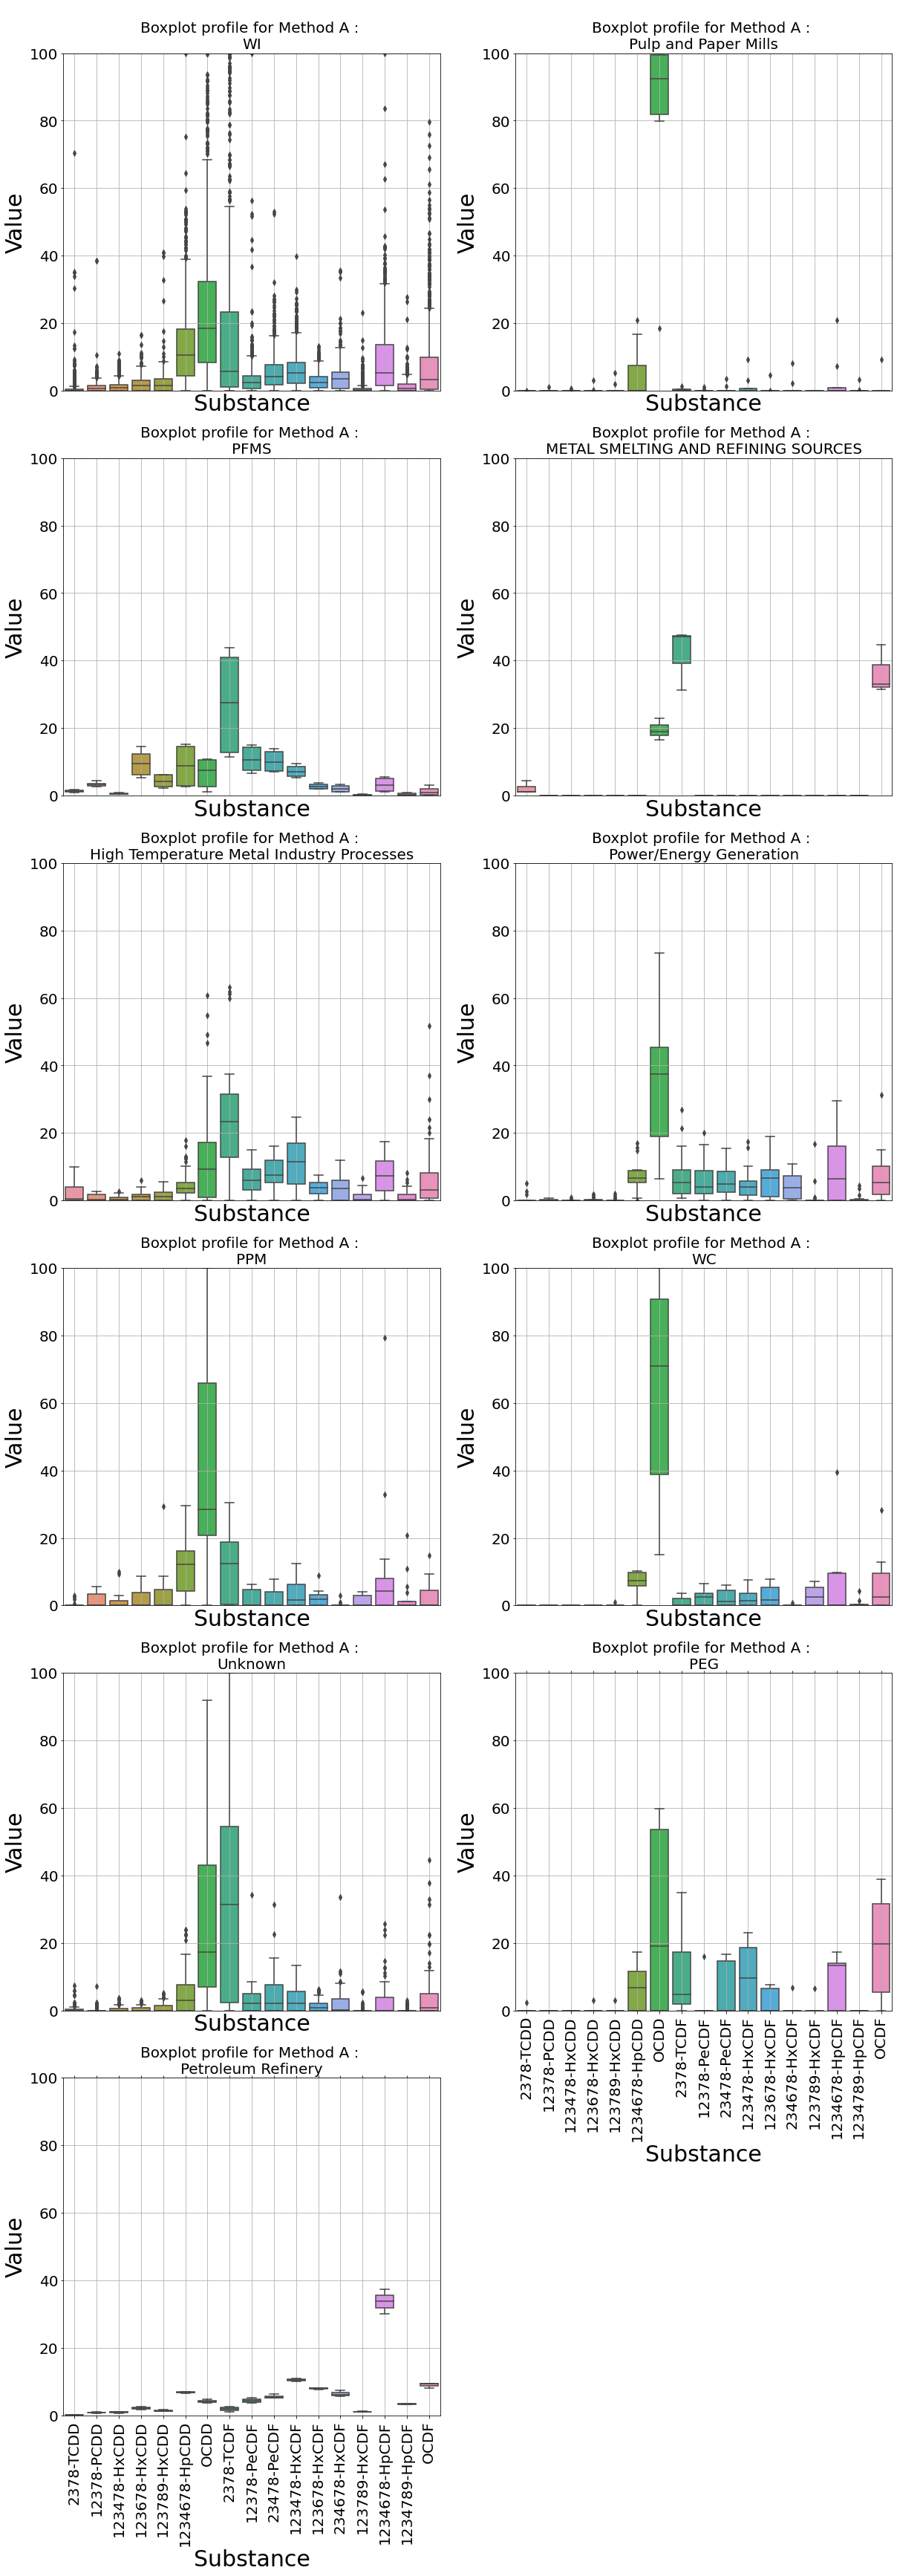

In [18]:
f = plt.figure(figsize=(20,58.5))
X='Substance'
Y='Value'
df_methodeA_boxplot_total = pd.DataFrame(columns=['File', 'Date', 'Run id', 'Source category', 'Source subcategory', 'Substance', 'Value'])
for (j, test_categorie) in enumerate(categories):
    n = len(substances)
    df_methodeA_boxplot = pd.DataFrame(columns=['File', 'Date', 'Run id', 'Source category', 'Source subcategory', 'Substance', 'Value'])
    samples_list = []
    for sample in echantillons:
        if test_categorie in sample:
            samples_list.append(sample)
    for (k, sample) in enumerate(samples_list):
        data_extract = table_norme_A.loc[sample]
        for (i ,sub) in enumerate(substances):
            row = list(sample)
            row += [sub, data_extract[sub]]
            df_methodeA_boxplot.loc[k*n + i] = row
    df_methodeA_boxplot_total = df_methodeA_boxplot_total.append(df_methodeA_boxplot)
            
    ax = f.add_subplot(6,2, j+1)
    plt.title("\nBoxplot profile for Method A : \n" + test_categorie, fontsize=20)
    ax = sns.boxplot(x=X, y=Y, data=df_methodeA_boxplot)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    if j==10 or j==9:
        plt.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True)
    ax.set_xlabel(X, fontsize = 30)
    ax.set_ylabel(Y, fontsize = 30)
    plt.xticks(fontsize = 20, rotation=90)
    plt.yticks(fontsize = 20)
    plt.ylim(0,100)
    plt.grid()

plt.show()

### IV.a.3 Affichage synthétique par "source category"

#### Vision simple

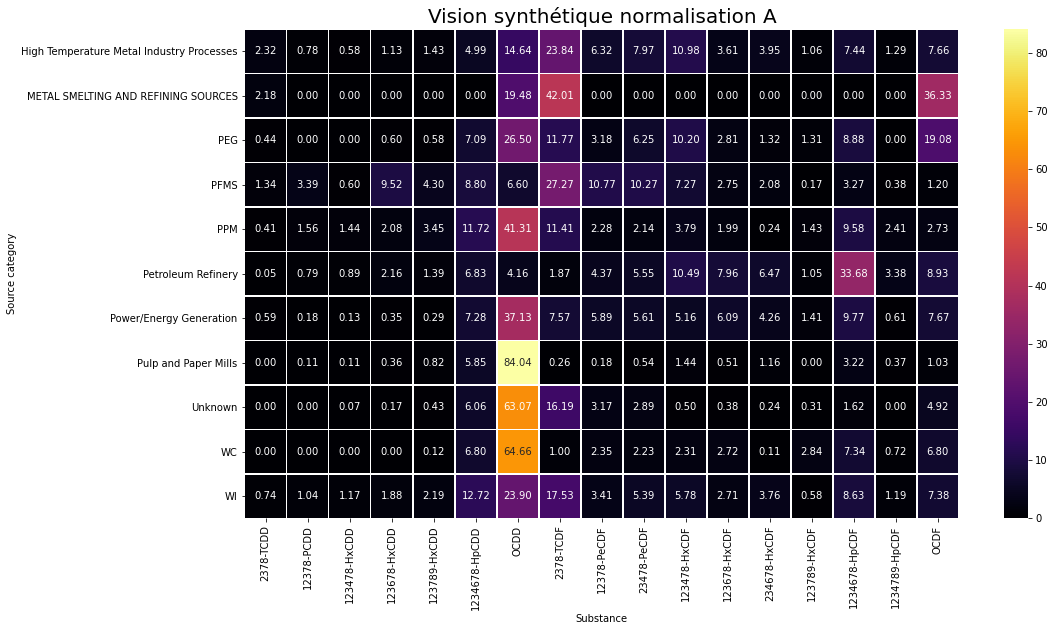

In [19]:
df_methodeA_boxplot_group = df_methodeA_boxplot_total.groupby(["Source category", "Substance"]).mean()
df_methodeA_boxplot_synthese = pd.DataFrame(columns=['Source category', 'Substance', 'Value'])
for (key, value) in enumerate(df_methodeA_boxplot_group["Value"]):
    row = list(df_methodeA_boxplot_group.index[key])
    row.append(value)
    df_methodeA_boxplot_synthese.loc[key] = row
    
df_methodeA_boxplot_synthese = df_methodeA_boxplot_synthese.pivot("Source category", "Substance", "Value")
df_methodeA_boxplot_synthese = df_methodeA_boxplot_synthese.reindex(substances, axis = 1)

f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Vision synthétique normalisation A",fontsize=20)
sns.heatmap(df_methodeA_boxplot_synthese, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.inferno)

#### Vision bornée

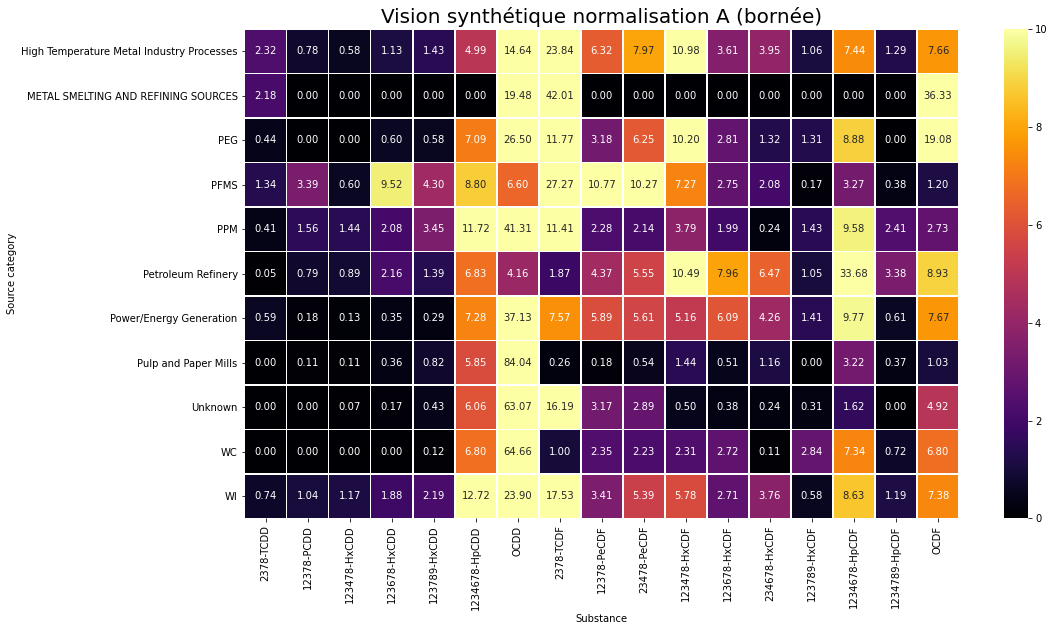

In [20]:
cap = 10
f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Vision synthétique normalisation A (bornée)",fontsize=20)
sns.heatmap(df_methodeA_boxplot_synthese, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.inferno, vmax = cap)

#### Vision logarithmique

C:\Users\dsamy\Anaconda3\envs\ineris\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


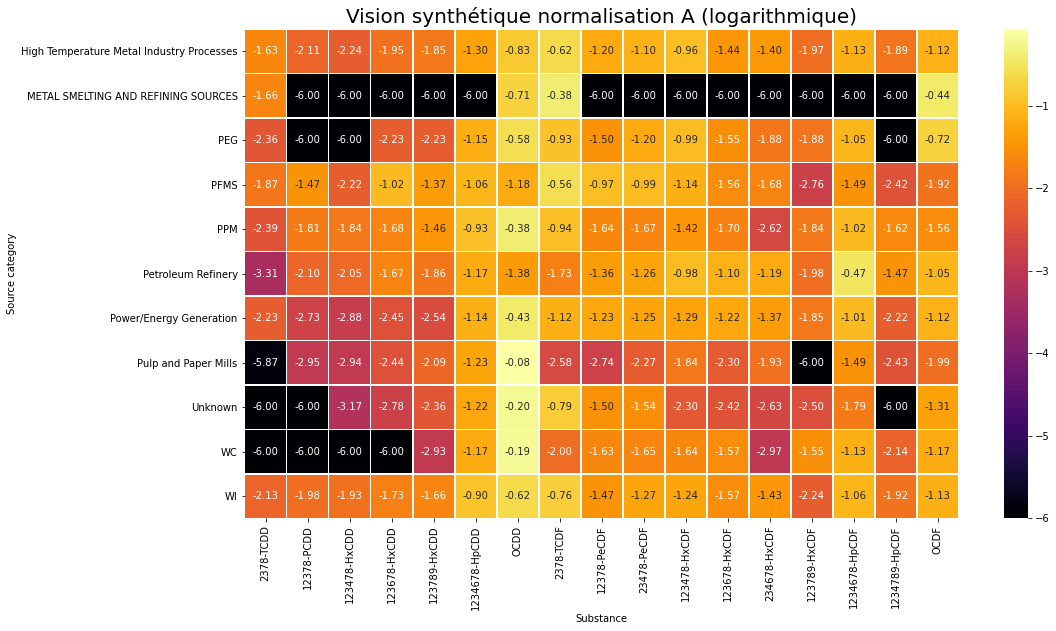

In [21]:
df_methodeA_boxplot_synthese_log = np.log10(df_methodeA_boxplot_synthese / 100)
df_methodeA_boxplot_synthese_log = df_methodeA_boxplot_synthese_log.replace(-np.inf, np.inf)
df_methodeA_boxplot_synthese_log = df_methodeA_boxplot_synthese_log.replace(np.inf, np.floor(np.min(df_methodeA_boxplot_synthese_log.values)))
f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Vision synthétique normalisation A (logarithmique)",fontsize=20)
sns.heatmap(df_methodeA_boxplot_synthese_log, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.inferno)

#### Préparation des données

No handles with labels found to put in legend.


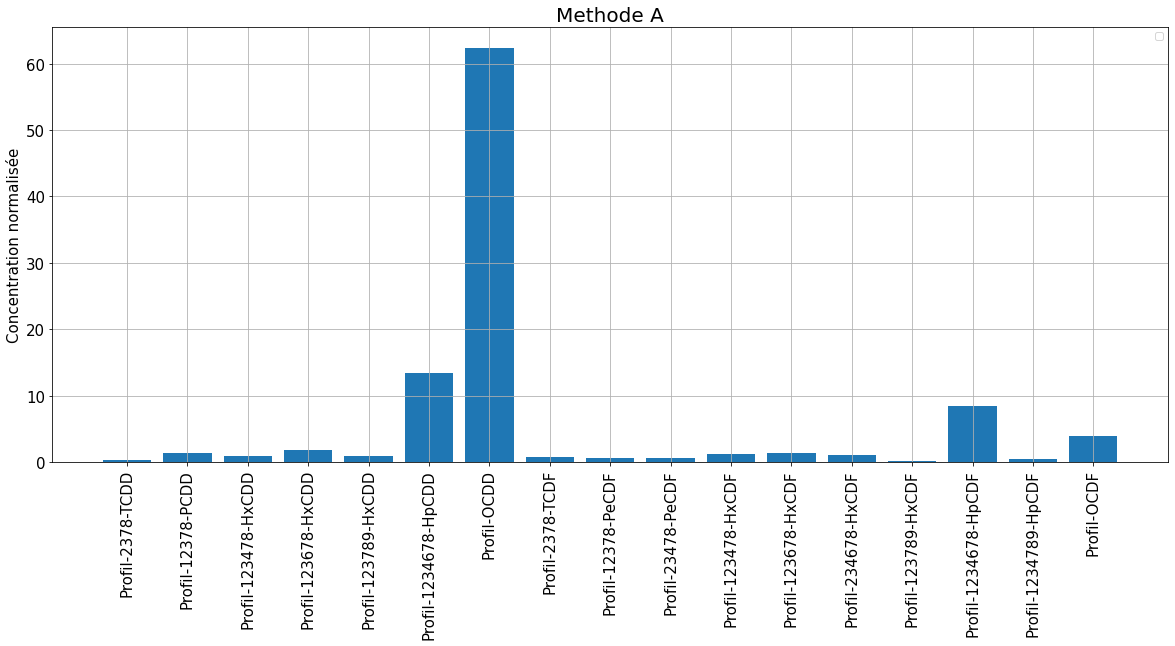

In [22]:
df_methodeA = df.copy()

congeneres = ['2378-TCDD', '12378-PCDD', '123478-HxCDD', '123678-HxCDD',
       '123789-HxCDD', '1234678-HpCDD', 'OCDD', '2378-TCDF', '12378-PeCDF',
       '23478-PeCDF', '123478-HxCDF', '123678-HxCDF', '234678-HxCDF',
       '123789-HxCDF', '1234678-HpCDF', '1234789-HpCDF', 'OCDF']

for i in congeneres:
    df_methodeA['Profil-'+i] = df_methodeA[i] * 100/df['TOTAL']

plt.rcParams["figure.figsize"] = (20,8)
plt.bar(df_methodeA.columns[-17:], df_methodeA.values[0][-17:])

plt.title(f"Methode A",fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel('Concentration normalisée',fontsize=15)
plt.xticks(fontsize=15,rotation=90)


plt.legend()
plt.grid()
plt.show()

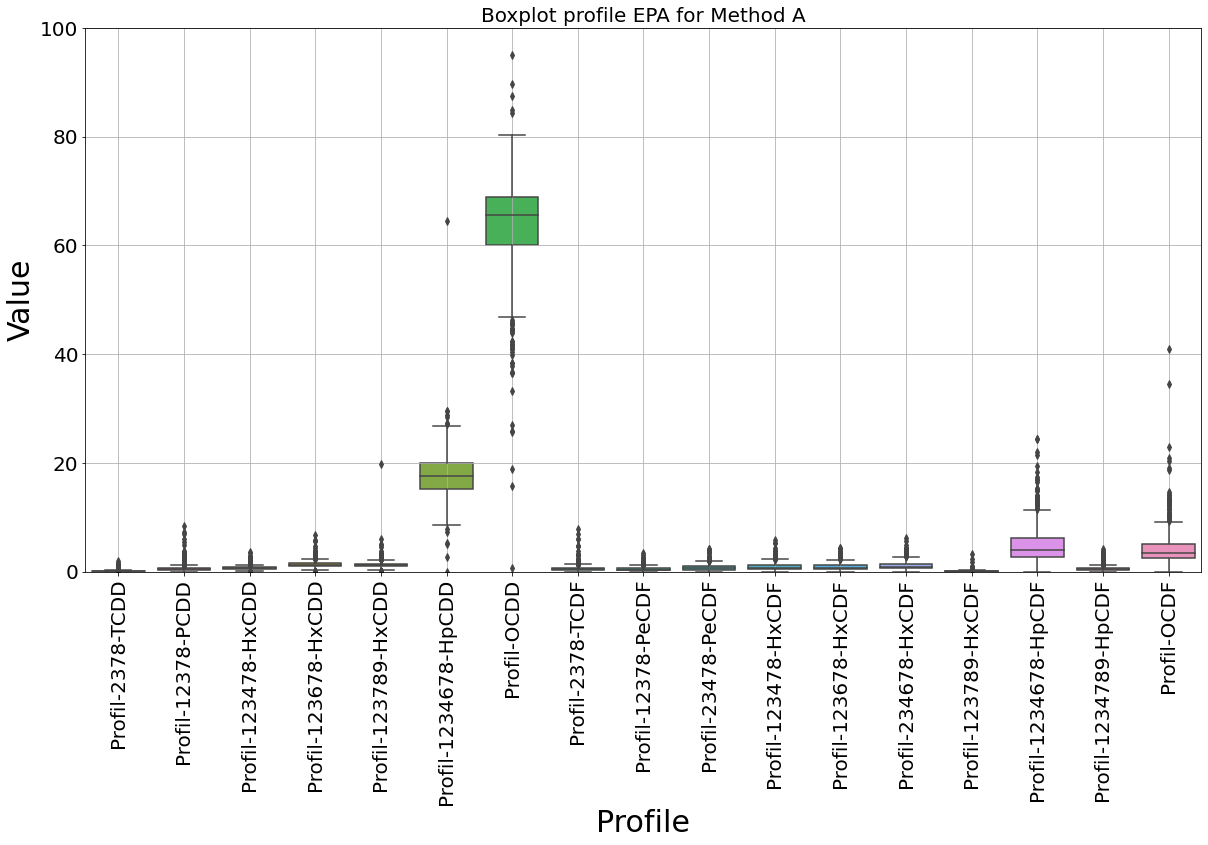

In [23]:
Profiles = ['Profil-2378-TCDD', 'Profil-12378-PCDD',
       'Profil-123478-HxCDD', 'Profil-123678-HxCDD', 'Profil-123789-HxCDD',
       'Profil-1234678-HpCDD', 'Profil-OCDD', 'Profil-2378-TCDF',
       'Profil-12378-PeCDF', 'Profil-23478-PeCDF', 'Profil-123478-HxCDF',
       'Profil-123678-HxCDF', 'Profil-234678-HxCDF', 'Profil-123789-HxCDF',
       'Profil-1234678-HpCDF', 'Profil-1234789-HpCDF', 'Profil-OCDF']
df_methodeA_boxplot = pd.DataFrame(columns=['Site', 'Type', 'Site #', 'Moment', 'Dates', 'Year', 'Season', 'Profile', 'Value'])

for i in range(736):
    for j,p in enumerate(Profiles):
        df_methodeA_boxplot.loc[i*len(Profiles)+j] = list(df_methodeA.values[i][:7]) + [p,df_methodeA.values[i][j+45]]
        
PRO = ['Profil-2378-TCDD', 'Profil-12378-PCDD',
       'Profil-123478-HxCDD', 'Profil-123678-HxCDD', 'Profil-123789-HxCDD',
       'Profil-1234678-HpCDD', 'Profil-OCDD', 'Profil-2378-TCDF',
       'Profil-12378-PeCDF', 'Profil-23478-PeCDF', 'Profil-123478-HxCDF',
       'Profil-123678-HxCDF', 'Profil-234678-HxCDF', 'Profil-123789-HxCDF',
       'Profil-1234678-HpCDF', 'Profil-1234789-HpCDF', 'Profil-OCDF']
df_methodeA_boxplot_ = df_methodeA_boxplot[df_methodeA_boxplot['Profile'].isin(PRO)]
X='Profile'
Y='Value'


plt.figure(figsize = (20, 10))
plt.title("Boxplot profile EPA for Method A",fontsize=20)
ax = sns.boxplot(x=X, y=Y, data=df_methodeA_boxplot_)
ax.set_xlabel(X, fontsize = 30)
ax.set_ylabel(Y, fontsize = 30)
# plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(fontsize = 20, rotation=90)
plt.yticks(fontsize = 20)
plt.ylim(0,100)
plt.grid()

plt.show()

#### Différence brute entre l'émission et le bruit de fond

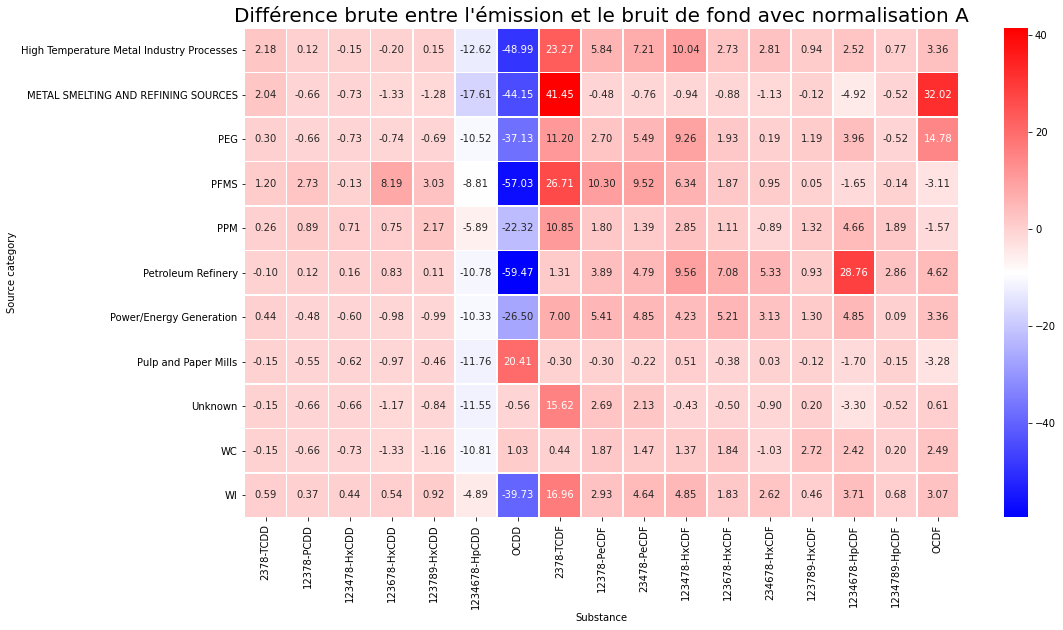

In [24]:
list_ref = df_methodeA_boxplot_[["Profile", "Value"]].groupby("Profile").mean()
list_ref = list_ref.reindex(Profiles, axis = 0)
list_ref = list_ref["Value"].values
df_methodeA_boxplot_diff = df_methodeA_boxplot_synthese - list_ref

f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Différence brute entre l'émission et le bruit de fond avec normalisation A",fontsize=20)
sns.heatmap(df_methodeA_boxplot_diff, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.bwr)

#### Différence brute entre l'émission et le bruit de fond (bornée)

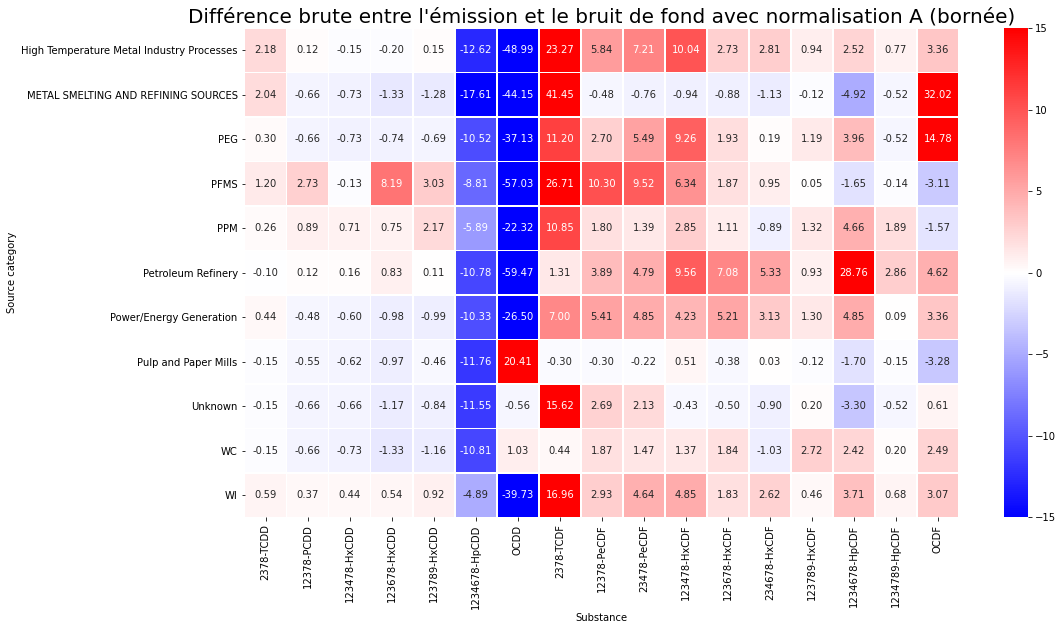

In [25]:
cap = 15
f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Différence brute entre l'émission et le bruit de fond avec normalisation A (bornée)",fontsize=20)
sns.heatmap(df_methodeA_boxplot_diff, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.bwr, vmax = cap, vmin = -cap)

#### Différence relative entre l'émission et le bruit de fond

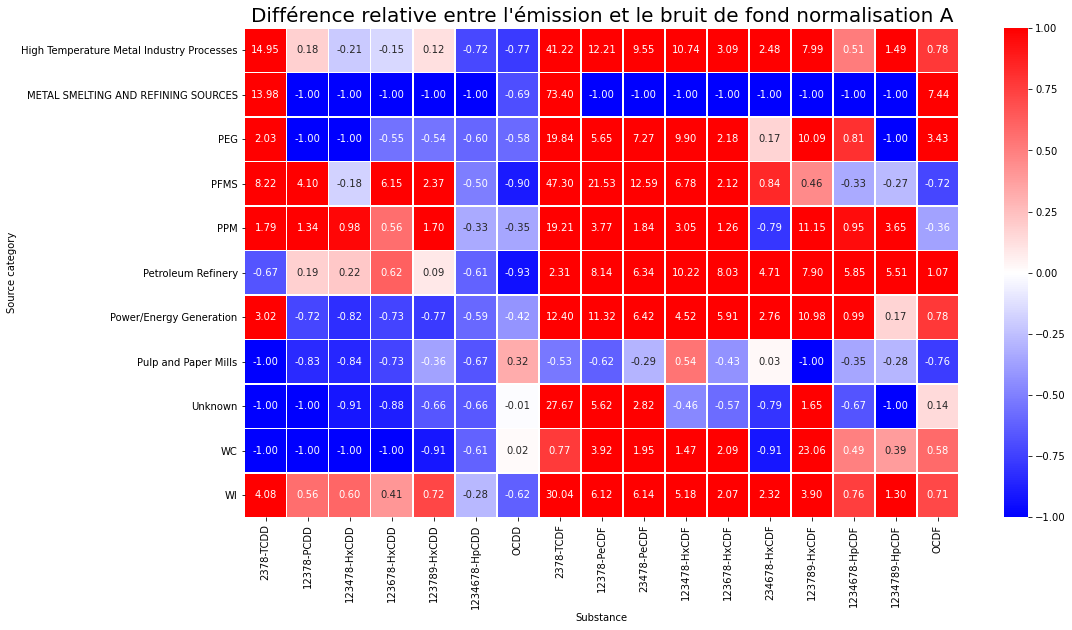

In [26]:
df_methodeA_boxplot_rapport = df_methodeA_boxplot_diff/list_ref
f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Différence relative entre l'émission et le bruit de fond normalisation A",fontsize=20)
sns.heatmap(df_methodeA_boxplot_rapport, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.bwr, vmax = 1, vmin = -1)

### IV.a.4 Affichage par "source subcategory"

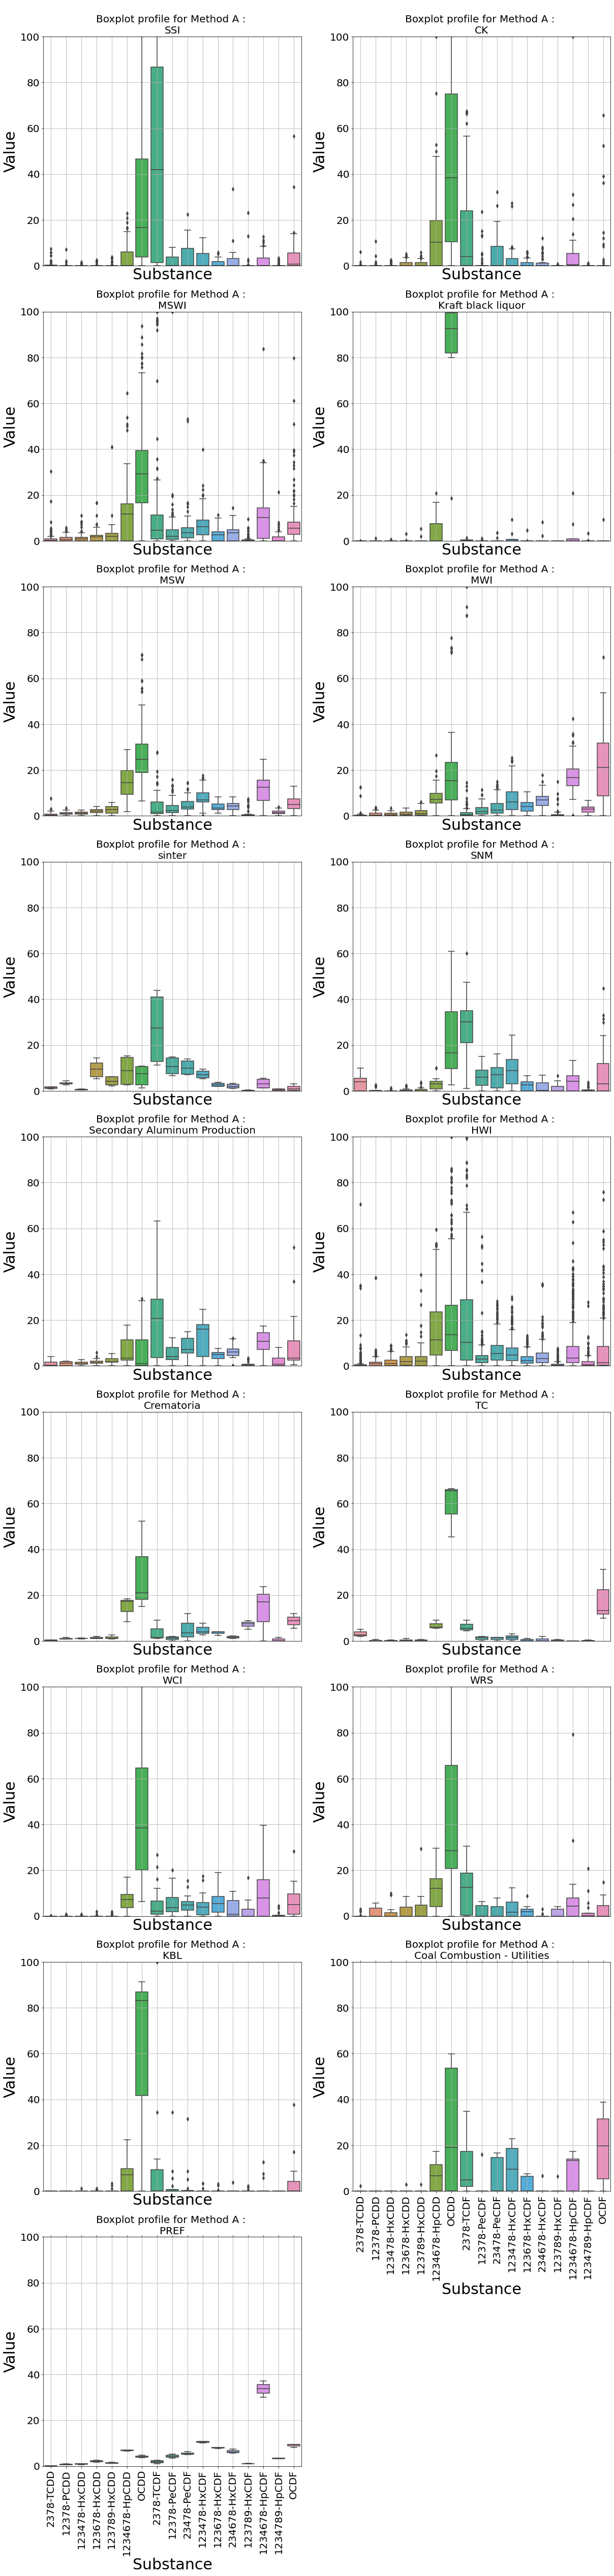

In [27]:
f = plt.figure(figsize=(20,88))
X='Substance'
Y='Value'

for (j, test_subcategorie) in enumerate(subcategories):
    n = len(substances)
    df_methodeA_boxplot = pd.DataFrame(columns=['File', 'Date', 'Run id', 'Source category', 'Source subcategory', 'Substance', 'Value'])
    samples_list = []
    for sample in echantillons:
        if test_subcategorie in sample:
            samples_list.append(sample)
    for (k, sample) in enumerate(samples_list):
        data_extract = table_norme_A.loc[sample]
        for (i ,sub) in enumerate(substances):
            row = list(sample)
            row += [sub, data_extract[sub]]
            df_methodeA_boxplot.loc[k*n + i] = row
            
    ax = f.add_subplot(9,2, j+1)
    plt.title("\nBoxplot profile for Method A : \n" + test_subcategorie, fontsize=20)
    ax = sns.boxplot(x=X, y=Y, data=df_methodeA_boxplot)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    if j==15 or j==16:
        plt.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True)
    ax.set_xlabel(X, fontsize = 30)
    ax.set_ylabel(Y, fontsize = 30)
    plt.xticks(fontsize = 20, rotation=90)
    plt.yticks(fontsize = 20)
    plt.ylim(0,100)
    plt.grid()

plt.show()

### IV.a.5 Affichage synthétique par "source subcategory"

#### Vision simple

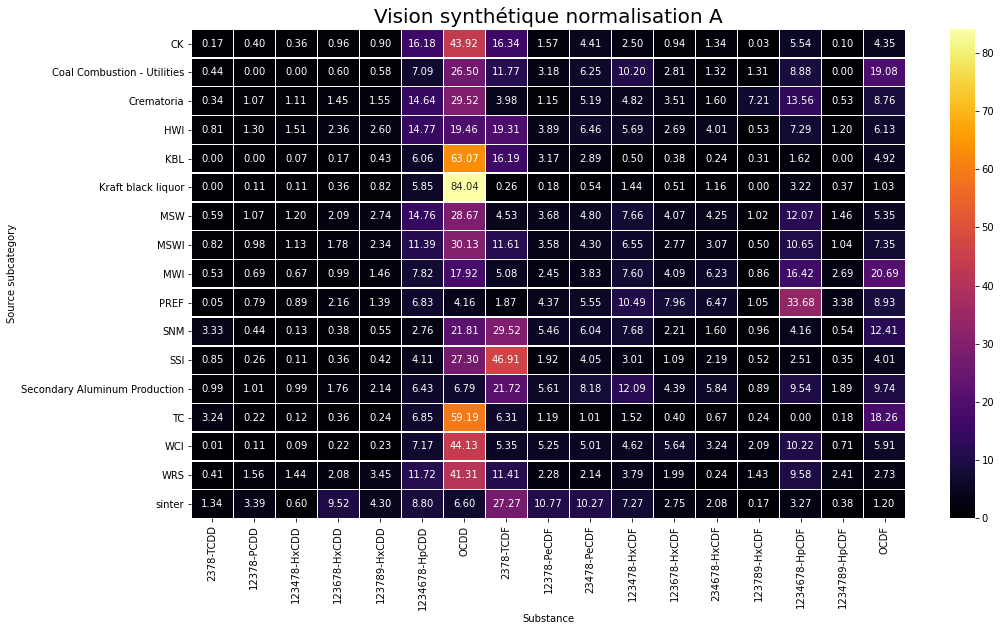

In [28]:
df_methodeA_boxplot_group = df_methodeA_boxplot_total.groupby(["Source subcategory", "Substance"]).mean()
df_methodeA_boxplot_synthese = pd.DataFrame(columns=['Source subcategory', 'Substance', 'Value'])
for (key, value) in enumerate(df_methodeA_boxplot_group["Value"]):
    row = list(df_methodeA_boxplot_group.index[key])
    row.append(value)
    df_methodeA_boxplot_synthese.loc[key] = row
    
df_methodeA_boxplot_synthese = df_methodeA_boxplot_synthese.pivot("Source subcategory", "Substance", "Value")
df_methodeA_boxplot_synthese = df_methodeA_boxplot_synthese.reindex(substances, axis = 1)

f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Vision synthétique normalisation A",fontsize=20)
sns.heatmap(df_methodeA_boxplot_synthese, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.inferno)

#### Vision bornée

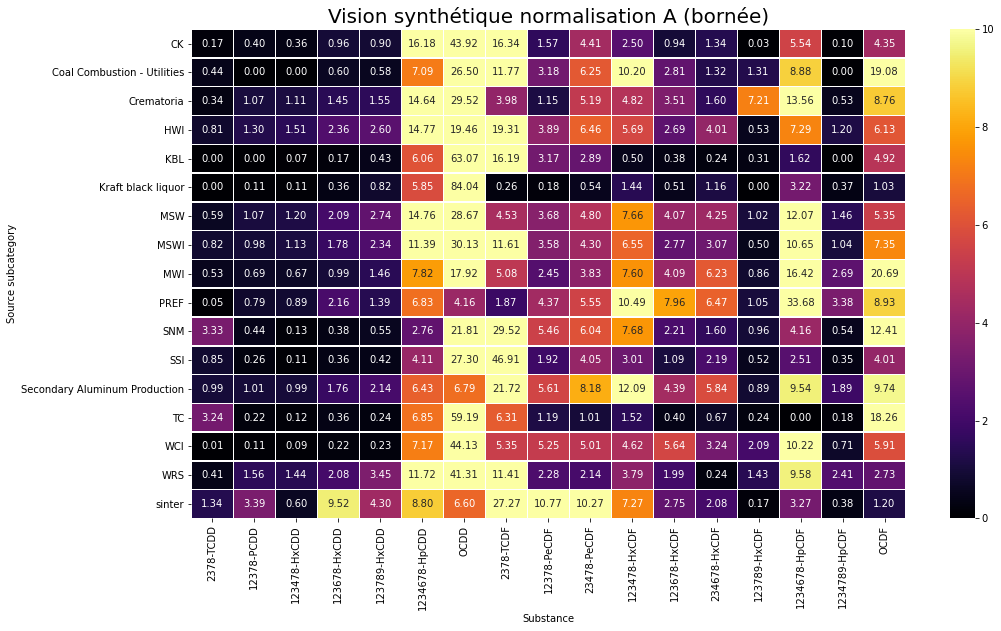

In [29]:
cap = 10
f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Vision synthétique normalisation A (bornée)",fontsize=20)
sns.heatmap(df_methodeA_boxplot_synthese, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.inferno, vmax = cap)

#### Vision logarithmique

C:\Users\dsamy\Anaconda3\envs\ineris\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


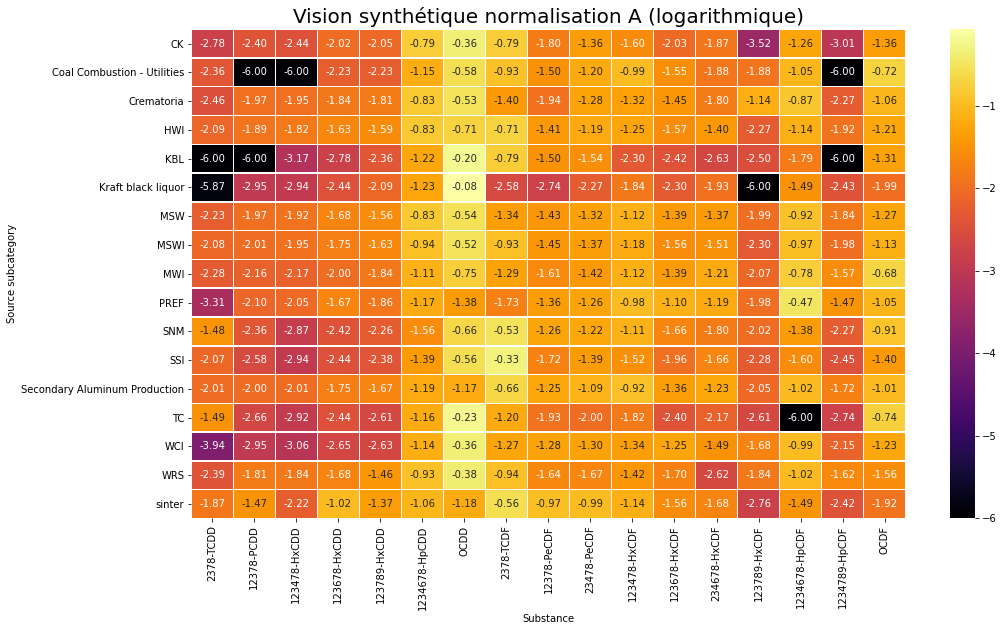

In [30]:
df_methodeA_boxplot_synthese_log = np.log10(df_methodeA_boxplot_synthese / 100)
df_methodeA_boxplot_synthese_log = df_methodeA_boxplot_synthese_log.replace(-np.inf, np.inf)
df_methodeA_boxplot_synthese_log = df_methodeA_boxplot_synthese_log.replace(np.inf, np.floor(np.min(df_methodeA_boxplot_synthese_log.values)))
f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Vision synthétique normalisation A (logarithmique)",fontsize=20)
sns.heatmap(df_methodeA_boxplot_synthese_log, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.inferno)

#### Différence brute entre l'émission et le bruit de fond

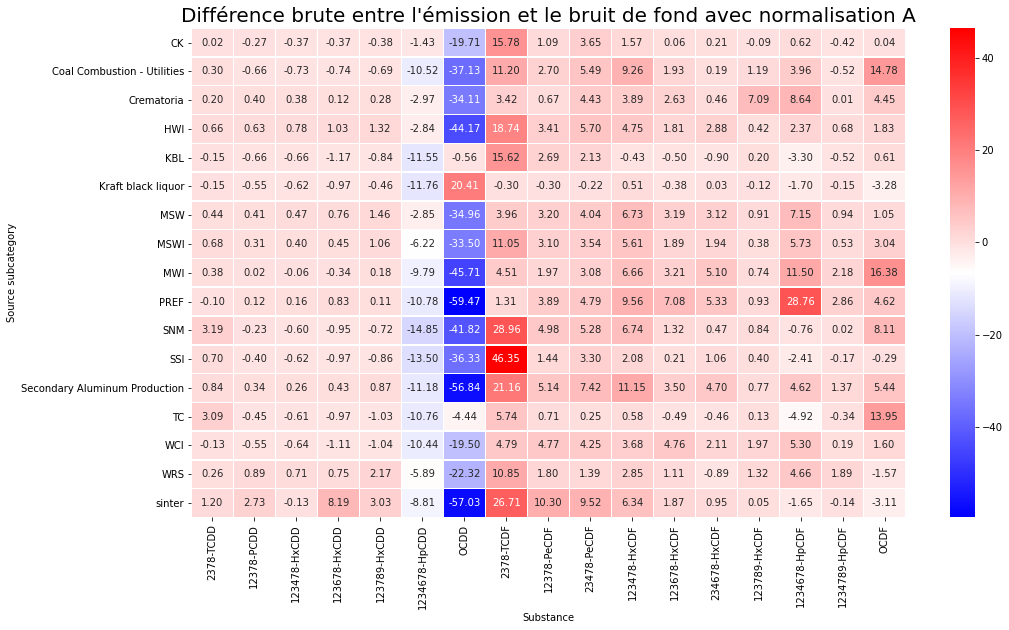

In [31]:
df_methodeA_boxplot_diff = df_methodeA_boxplot_synthese - list_ref

f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Différence brute entre l'émission et le bruit de fond avec normalisation A",fontsize=20)
sns.heatmap(df_methodeA_boxplot_diff, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.bwr)

#### Différence brute entre l'émission et le bruit de fond (bornée)

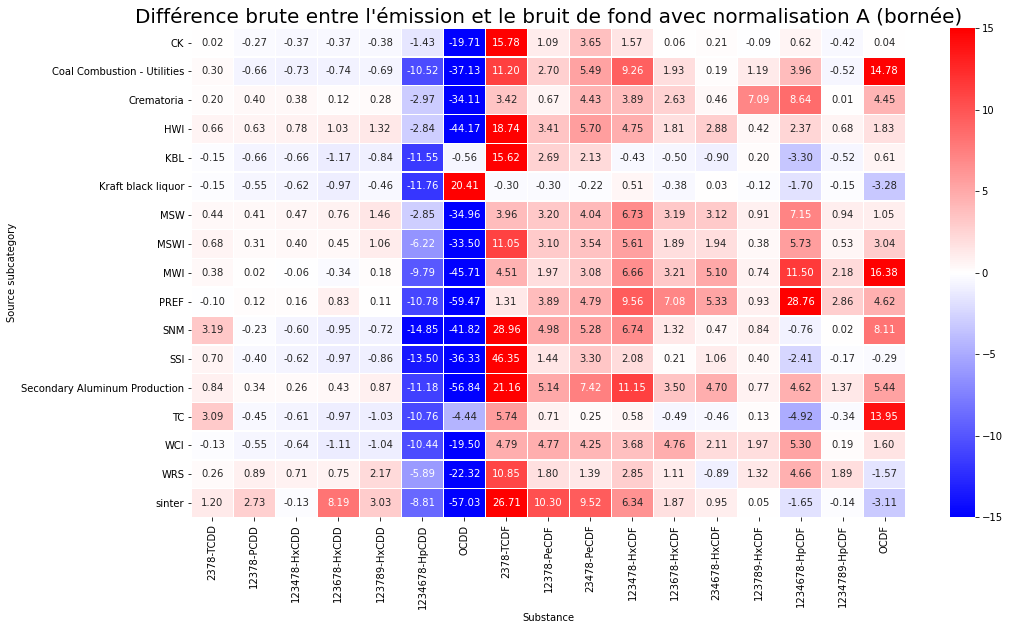

In [32]:
cap = 15
f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Différence brute entre l'émission et le bruit de fond avec normalisation A (bornée)",fontsize=20)
sns.heatmap(df_methodeA_boxplot_diff, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.bwr, vmax = cap, vmin = -cap)

#### Différence relative entre l'émission et le bruit de fond

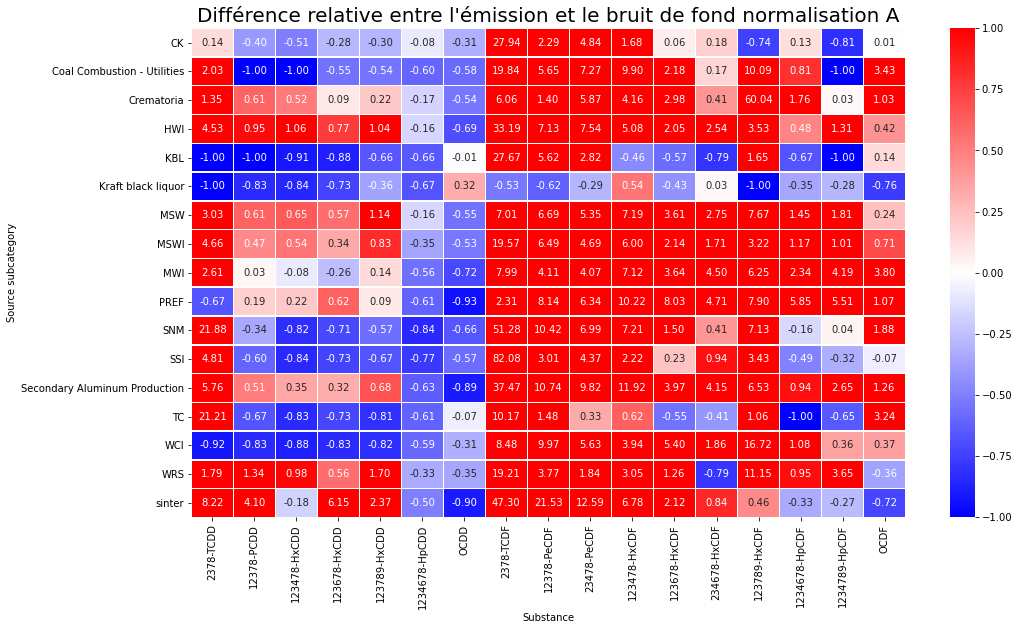

In [33]:
df_methodeA_boxplot_rapport = df_methodeA_boxplot_diff/list_ref
f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Différence relative entre l'émission et le bruit de fond normalisation A",fontsize=20)
sns.heatmap(df_methodeA_boxplot_rapport, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.bwr, vmax = 1, vmin = -1)

### IV.b Norme B

In [34]:
congeneres_TEQ = [('2378-TCDD',1), ('12378-PCDD',0.5), ('123478-HxCDD',0.1), ('123678-HxCDD',0.1),
       ('123789-HxCDD',0.1), ('1234678-HpCDD',0.01), ('OCDD',0.001), ('2378-TCDF',0.1), ('12378-PeCDF',0.05),
       ('23478-PeCDF',0.5), ('123478-HxCDF',0.1), ('123678-HxCDF',0.1), ('234678-HxCDF',0.1),
       ('123789-HxCDF',0.1), ('1234678-HpCDF',0.01), ('1234789-HpCDF',0.01), ('OCDF',0.001)]
table_norme_B = table_final[substances]
table_final["total B sub 2378"] = 0
for sub_teq in congeneres_TEQ:
    sub = sub_teq[0]
    table_norme_B[sub] = table_norme_B[sub] * sub_teq[1]
    table_final["total B sub 2378"] += table_norme_B[sub]
for sub in substances:
    table_norme_B[sub] = table_norme_B[sub] * 100 / table_final["total B sub 2378"]

C:\Users\dsamy\Anaconda3\envs\ineris\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\dsamy\Anaconda3\envs\ineris\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


### IV.b.1 Affichage sur un échantillon

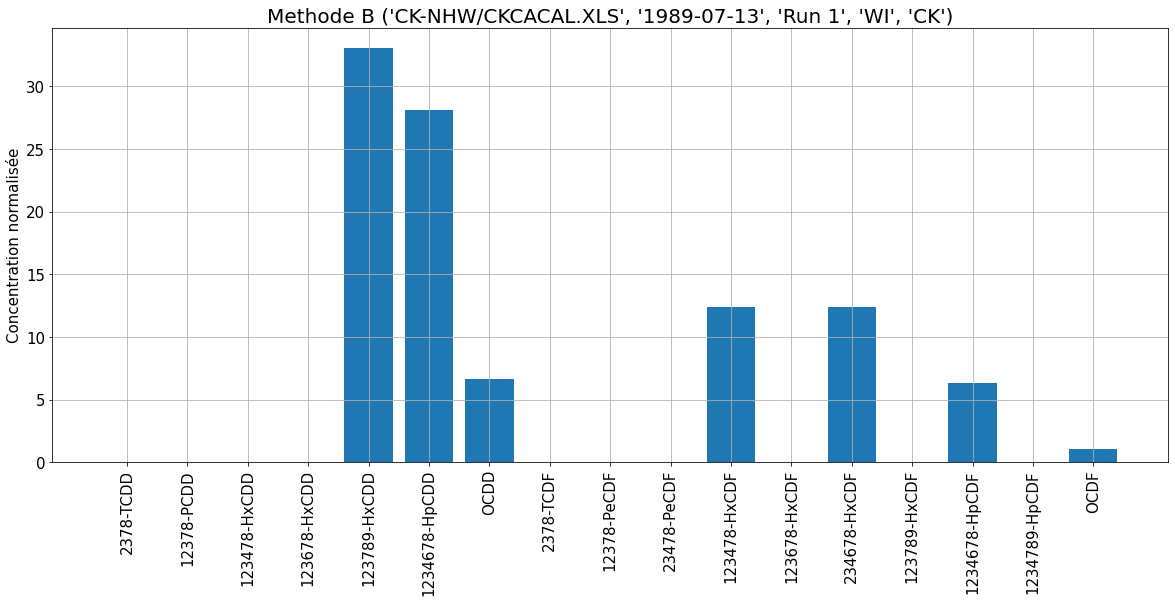

In [35]:
test = echantillons[0]
plt.rcParams["figure.figsize"] = (20,8)
plt.bar(substances, table_norme_B.loc[test].values)
plt.title(f"Methode B " + str(test),fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel('Concentration normalisée',fontsize=15)
plt.xticks(fontsize=15,rotation=90)

plt.grid()
plt.show()

### IV.b.2 Affichage par "source category"

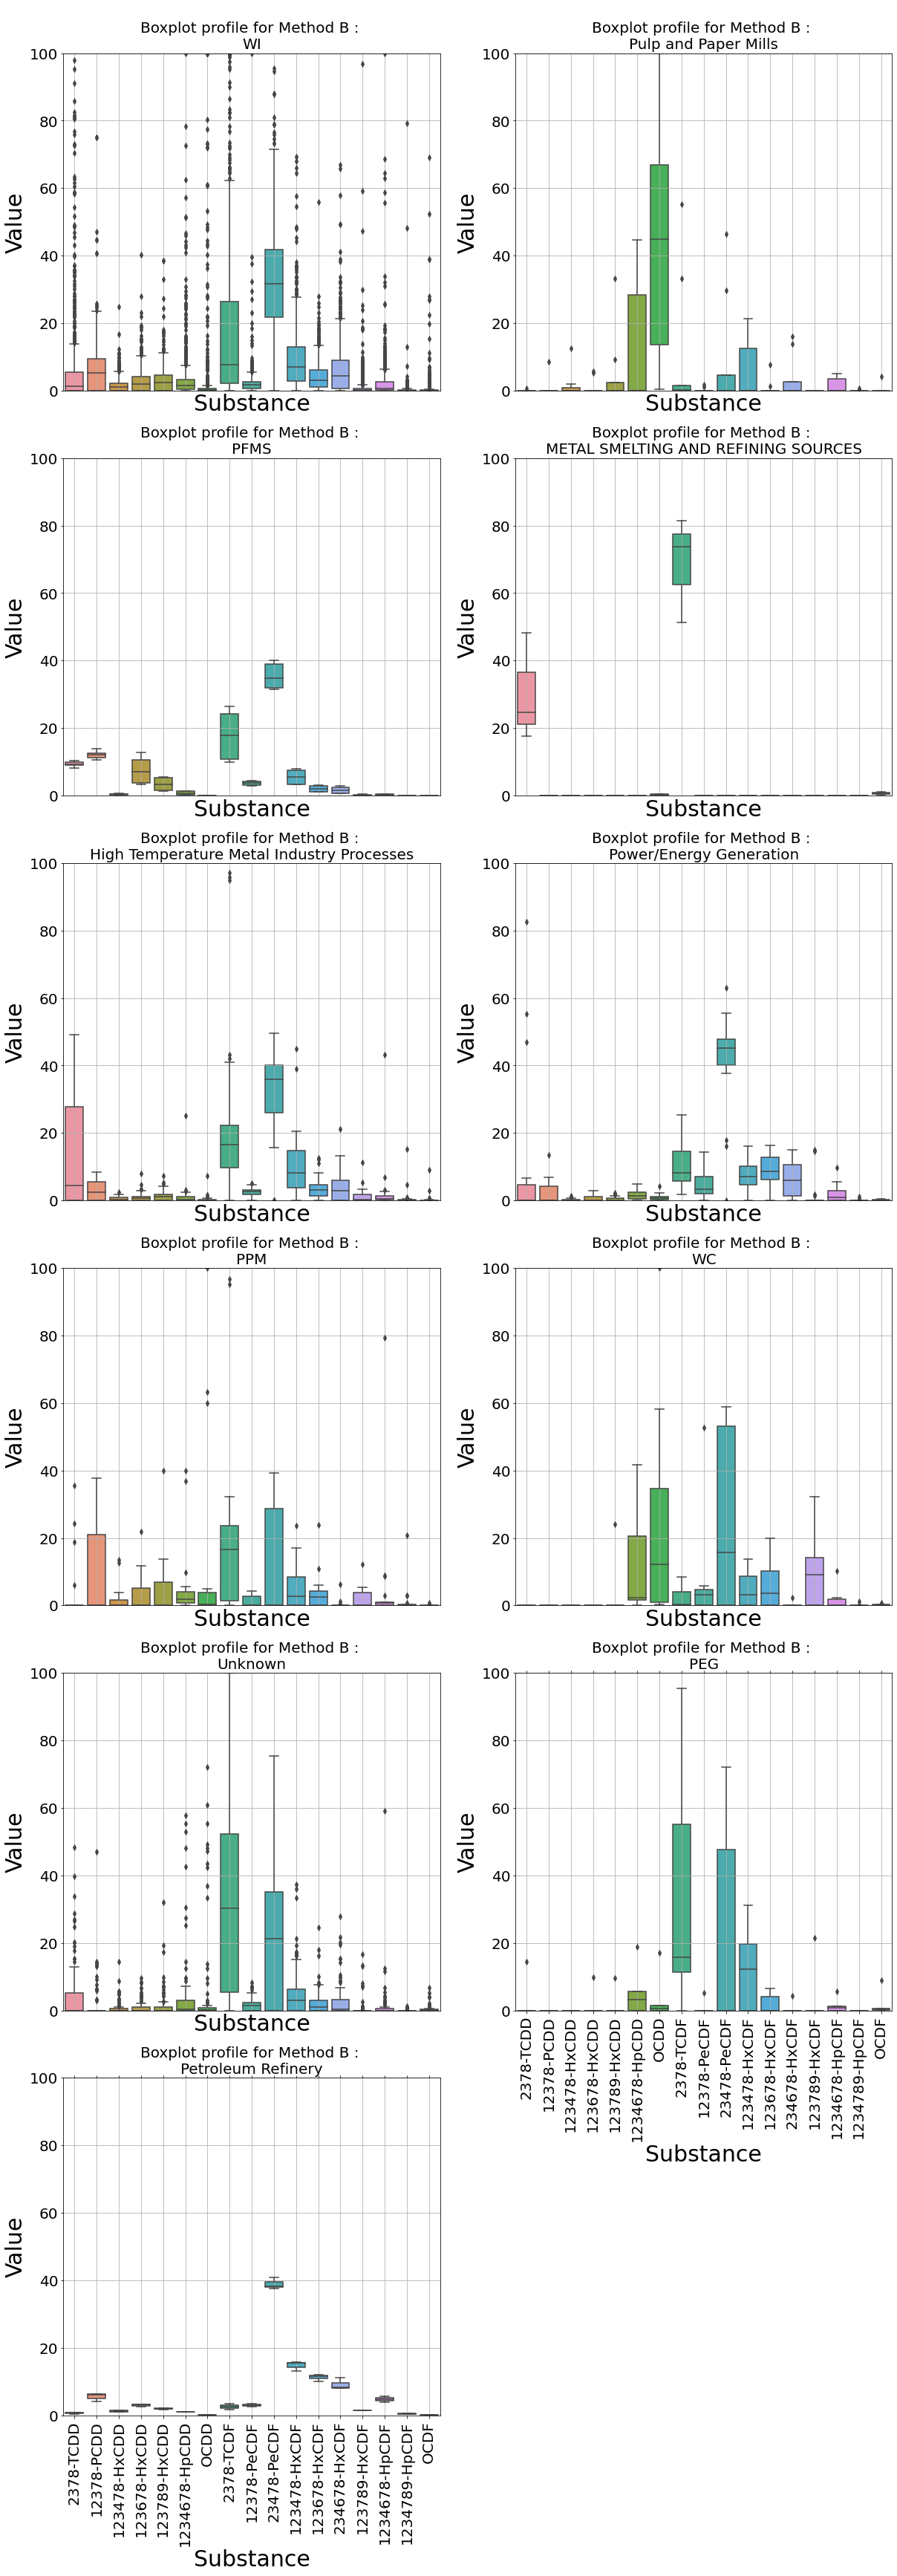

In [36]:
f = plt.figure(figsize=(20,58.5))
X='Substance'
Y='Value'
df_methodeB_boxplot_total = pd.DataFrame(columns=['File', 'Date', 'Run id', 'Source category', 'Source subcategory', 'Substance', 'Value'])
for (j, test_categorie) in enumerate(categories):
    n = len(substances)
    df_methodeB_boxplot = pd.DataFrame(columns=['File', 'Date', 'Run id', 'Source category', 'Source subcategory', 'Substance', 'Value'])
    samples_list = []
    for sample in echantillons:
        if test_categorie in sample:
            samples_list.append(sample)
    for (k, sample) in enumerate(samples_list):
        data_extract = table_norme_B.loc[sample]
        for (i ,sub) in enumerate(substances):
            row = list(sample)
            row += [sub, data_extract[sub]]
            df_methodeB_boxplot.loc[k*n + i] = row
    df_methodeB_boxplot_total = df_methodeB_boxplot_total.append(df_methodeB_boxplot)
            
    ax = f.add_subplot(6,2, j+1)
    plt.title("\nBoxplot profile for Method B : \n" + test_categorie, fontsize=20)
    ax = sns.boxplot(x=X, y=Y, data=df_methodeB_boxplot)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    if j==10 or j==9:
        plt.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True)
    ax.set_xlabel(X, fontsize = 30)
    ax.set_ylabel(Y, fontsize = 30)
    plt.xticks(fontsize = 20, rotation=90)
    plt.yticks(fontsize = 20)
    plt.ylim(0,100)
    plt.grid()

plt.show()

### IV.b.3 Affichage synthétique par "source category"

#### Vision simple

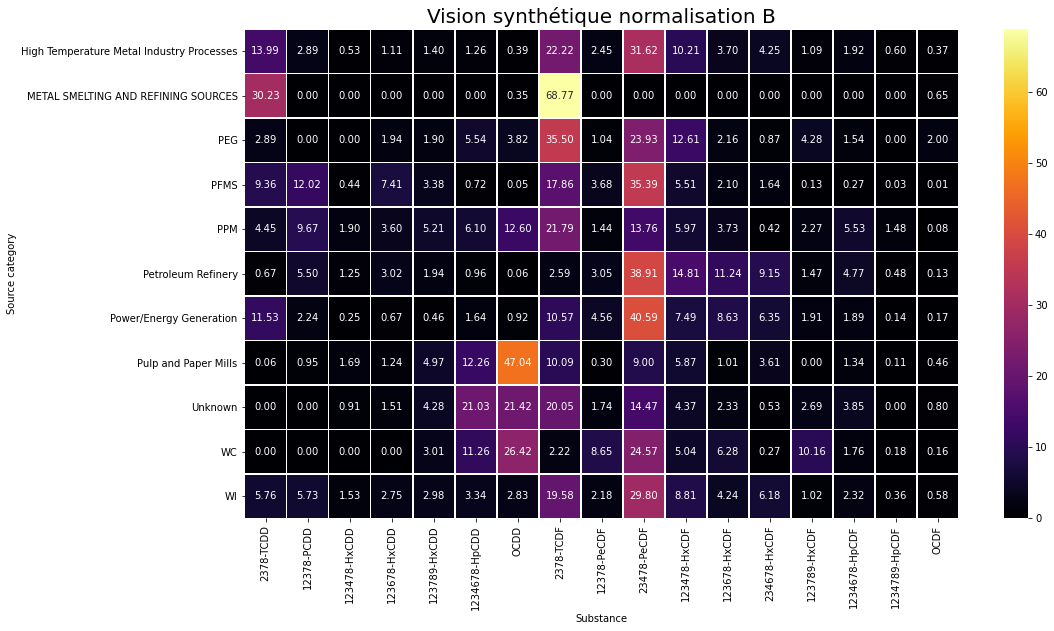

In [37]:
df_methodeB_boxplot_group = df_methodeB_boxplot_total.groupby(["Source category", "Substance"]).mean()
df_methodeB_boxplot_synthese = pd.DataFrame(columns=['Source category', 'Substance', 'Value'])
for (key, value) in enumerate(df_methodeB_boxplot_group["Value"]):
    row = list(df_methodeB_boxplot_group.index[key])
    row.append(value)
    df_methodeB_boxplot_synthese.loc[key] = row
    
df_methodeB_boxplot_synthese = df_methodeB_boxplot_synthese.pivot("Source category", "Substance", "Value")
df_methodeB_boxplot_synthese = df_methodeB_boxplot_synthese.reindex(substances, axis = 1)

f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Vision synthétique normalisation B",fontsize=20)
sns.heatmap(df_methodeB_boxplot_synthese, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.inferno)

#### Vision bornée

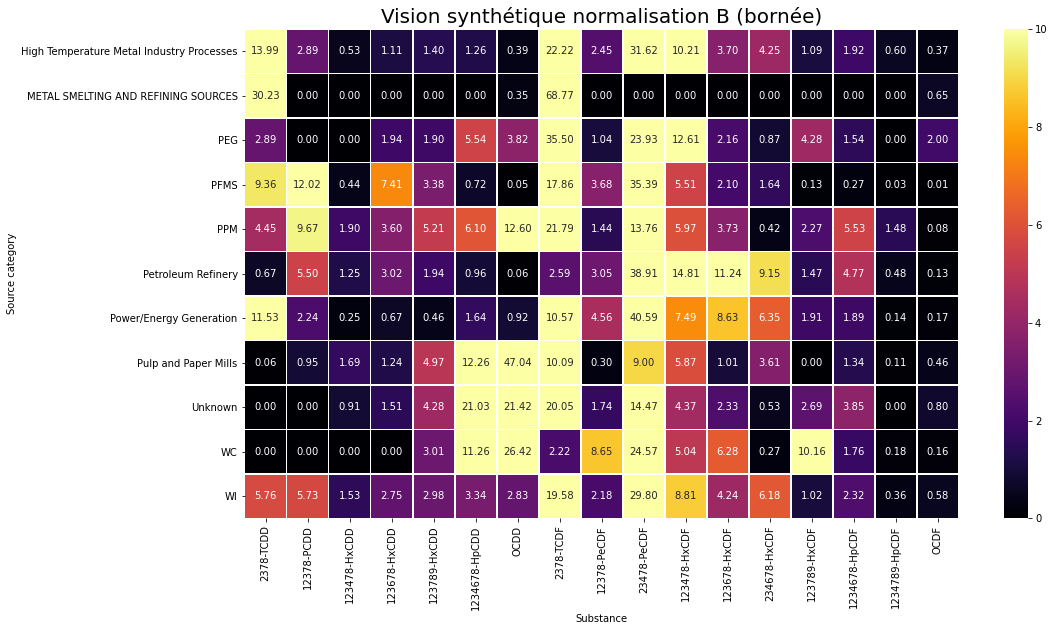

In [38]:
cap = 10
f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Vision synthétique normalisation B (bornée)",fontsize=20)
sns.heatmap(df_methodeB_boxplot_synthese, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.inferno, vmax = cap)

#### Vision logarithmique

C:\Users\dsamy\Anaconda3\envs\ineris\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


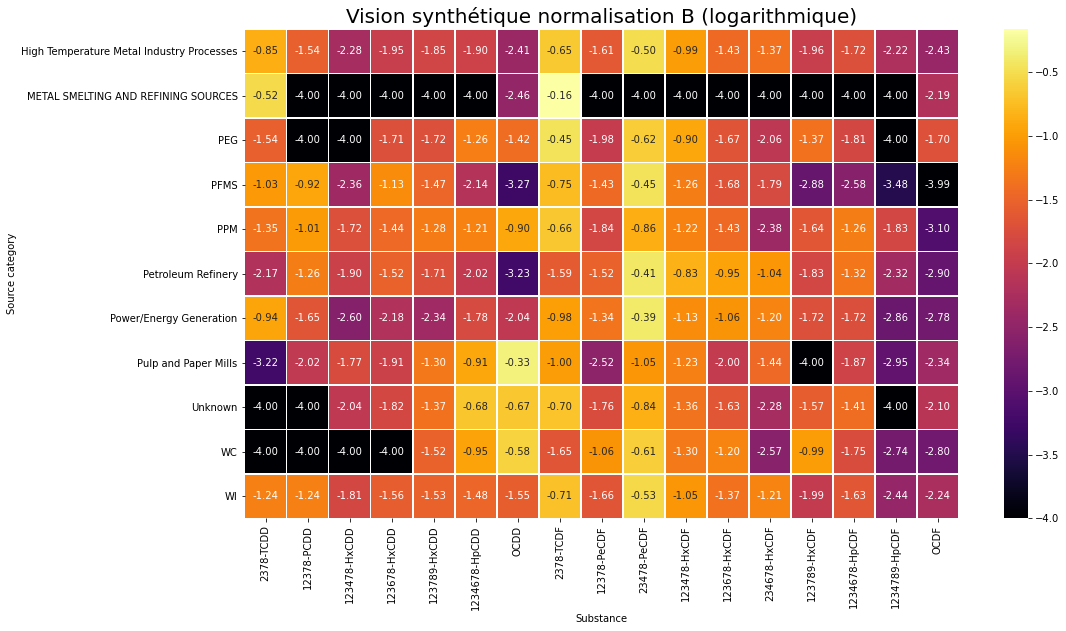

In [39]:
df_methodeB_boxplot_synthese_log = np.log10(df_methodeB_boxplot_synthese / 100)
df_methodeB_boxplot_synthese_log = df_methodeB_boxplot_synthese_log.replace(-np.inf, np.inf)
df_methodeB_boxplot_synthese_log = df_methodeB_boxplot_synthese_log.replace(np.inf, np.floor(np.min(df_methodeB_boxplot_synthese_log.values)))
f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Vision synthétique normalisation B (logarithmique)",fontsize=20)
sns.heatmap(df_methodeB_boxplot_synthese_log, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.inferno)

#### Préparation des données

No handles with labels found to put in legend.


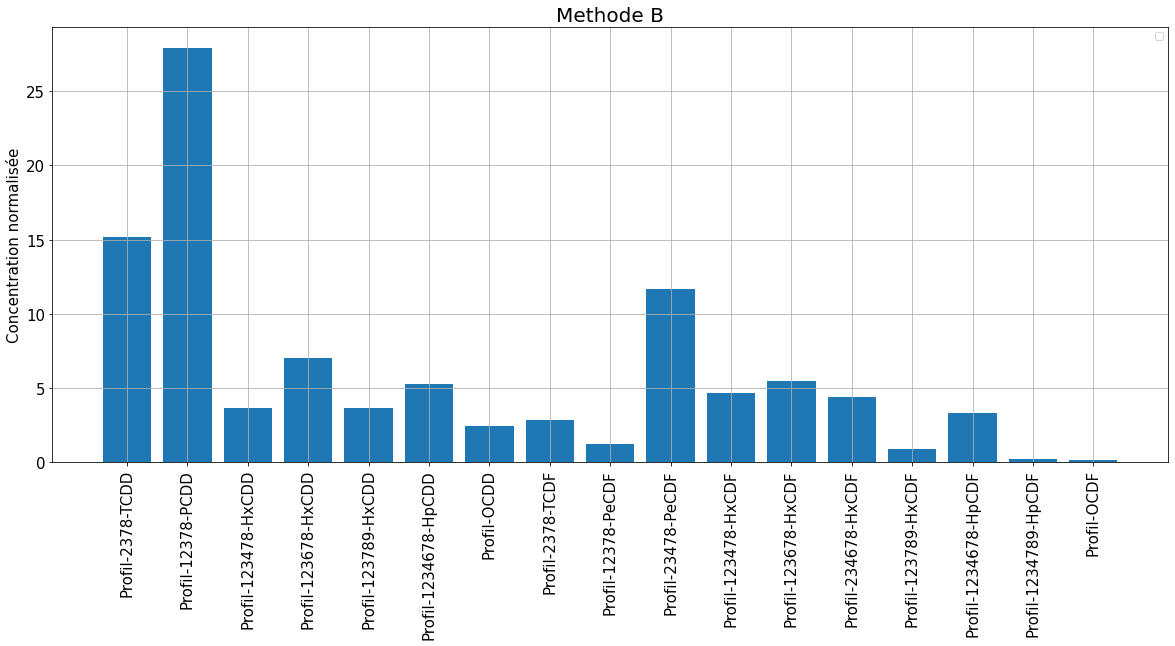

In [40]:
df_methodeB = df.copy()

congeneres_TEQ = [('2378-TCDD',1), ('12378-PCDD',0.5), ('123478-HxCDD',0.1), ('123678-HxCDD',0.1),
       ('123789-HxCDD',0.1), ('1234678-HpCDD',0.01), ('OCDD',0.001), ('2378-TCDF',0.1), ('12378-PeCDF',0.05),
       ('23478-PeCDF',0.5), ('123478-HxCDF',0.1), ('123678-HxCDF',0.1), ('234678-HxCDF',0.1),
       ('123789-HxCDF',0.1), ('1234678-HpCDF',0.01), ('1234789-HpCDF',0.01), ('OCDF',0.001)]


df_methodeB['Total-TEQ'] = 0
for i in congeneres_TEQ:
    df_methodeB['Total-TEQ'] = df_methodeB['Total-TEQ'] + df_methodeB[i[0]]*i[1]
    
for i in congeneres_TEQ:
    df_methodeB['Profil-'+i[0]] = 100*(df_methodeB[i[0]]*i[1])/df_methodeB['Total-TEQ']

plt.bar(df_methodeB.columns[-17:], df_methodeB.values[0][-17:])

plt.title(f"Methode B",fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel('Concentration normalisée',fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.rcParams["figure.figsize"] = (20,8)

plt.legend()
plt.grid()
plt.show()

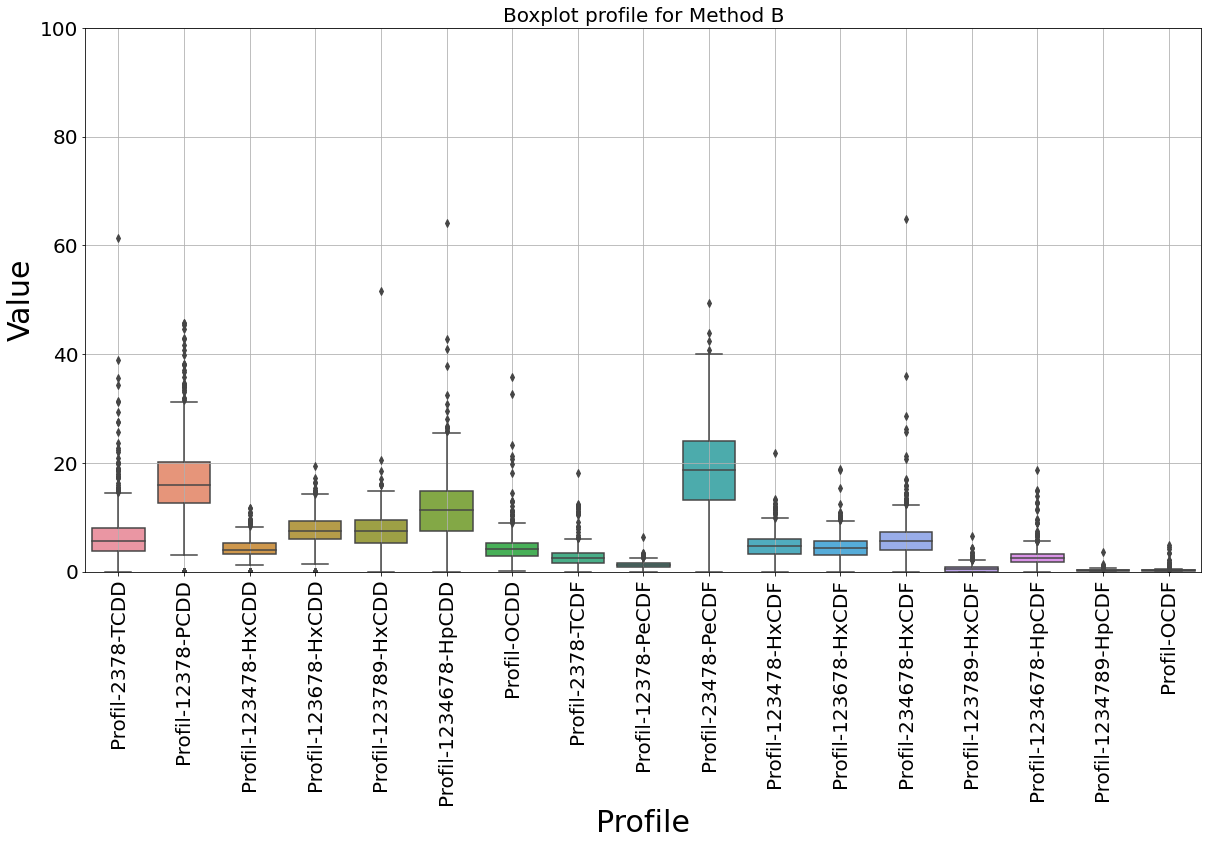

In [41]:
Profiles = ['Profil-2378-TCDD', 'Profil-12378-PCDD',
       'Profil-123478-HxCDD', 'Profil-123678-HxCDD', 'Profil-123789-HxCDD',
       'Profil-1234678-HpCDD', 'Profil-OCDD', 'Profil-2378-TCDF',
       'Profil-12378-PeCDF', 'Profil-23478-PeCDF', 'Profil-123478-HxCDF',
       'Profil-123678-HxCDF', 'Profil-234678-HxCDF', 'Profil-123789-HxCDF',
       'Profil-1234678-HpCDF', 'Profil-1234789-HpCDF', 'Profil-OCDF']
df_methodeB_boxplot = pd.DataFrame(columns=['Site', 'Type', 'Site #', 'Moment', 'Dates', 'Year', 'Season', 'Profile', 'Value'])


for i in range(736):
    for j,p in enumerate(Profiles):
        df_methodeB_boxplot.loc[i*len(Profiles)+j] = list(df_methodeB.values[i][:7]) + [p,df_methodeB.values[i][j+46]]

PRO = ['Profil-2378-TCDD', 'Profil-12378-PCDD',
       'Profil-123478-HxCDD', 'Profil-123678-HxCDD', 'Profil-123789-HxCDD',
       'Profil-1234678-HpCDD', 'Profil-OCDD', 'Profil-2378-TCDF',
       'Profil-12378-PeCDF', 'Profil-23478-PeCDF', 'Profil-123478-HxCDF',
       'Profil-123678-HxCDF', 'Profil-234678-HxCDF', 'Profil-123789-HxCDF',
       'Profil-1234678-HpCDF', 'Profil-1234789-HpCDF', 'Profil-OCDF']
df_methodeB_boxplot_ = df_methodeB_boxplot[df_methodeB_boxplot['Profile'].isin(PRO)]
X='Profile'
Y='Value'


plt.figure(figsize = (20, 10))
plt.title("Boxplot profile for Method B",fontsize=20)
ax = sns.boxplot(x=X, y=Y, data=df_methodeB_boxplot_)
ax.set_xlabel(X, fontsize = 30)
ax.set_ylabel(Y, fontsize = 30)
# plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(fontsize = 20, rotation=90)
plt.yticks(fontsize = 20)
plt.ylim(0,100)
plt.grid()

plt.show()

#### Différence brute entre l'émission et le bruit de fond

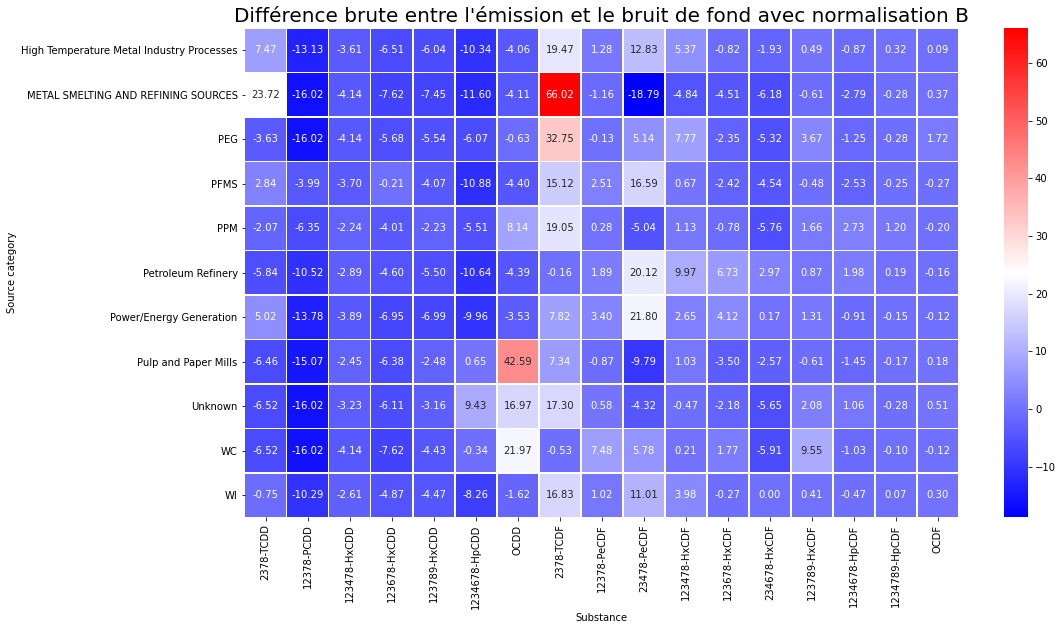

In [42]:
list_ref = df_methodeB_boxplot_[["Profile", "Value"]].groupby("Profile").mean()
list_ref = list_ref.reindex(Profiles, axis = 0)
list_ref = list_ref["Value"].values
df_methodeB_boxplot_diff = df_methodeB_boxplot_synthese - list_ref

f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Différence brute entre l'émission et le bruit de fond avec normalisation B",fontsize=20)
sns.heatmap(df_methodeB_boxplot_diff, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.bwr)

#### Différence brute entre l'émission et le bruit de fond (bornée)

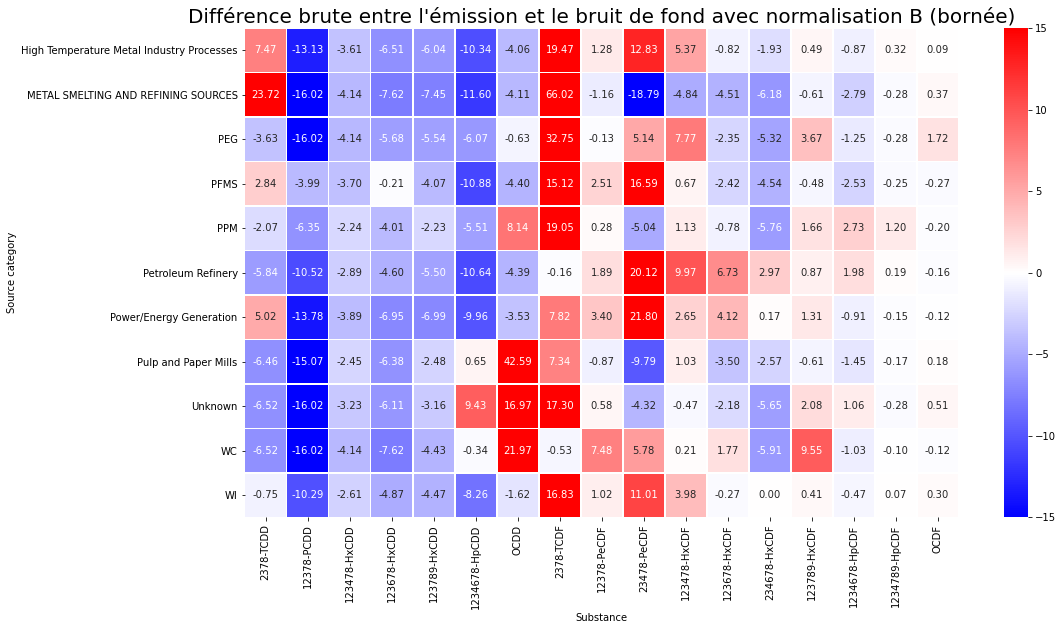

In [43]:
cap = 15
f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Différence brute entre l'émission et le bruit de fond avec normalisation B (bornée)",fontsize=20)
sns.heatmap(df_methodeB_boxplot_diff, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.bwr, vmax = cap, vmin = -cap)

#### Différence relative entre l'émission et le bruit de fond

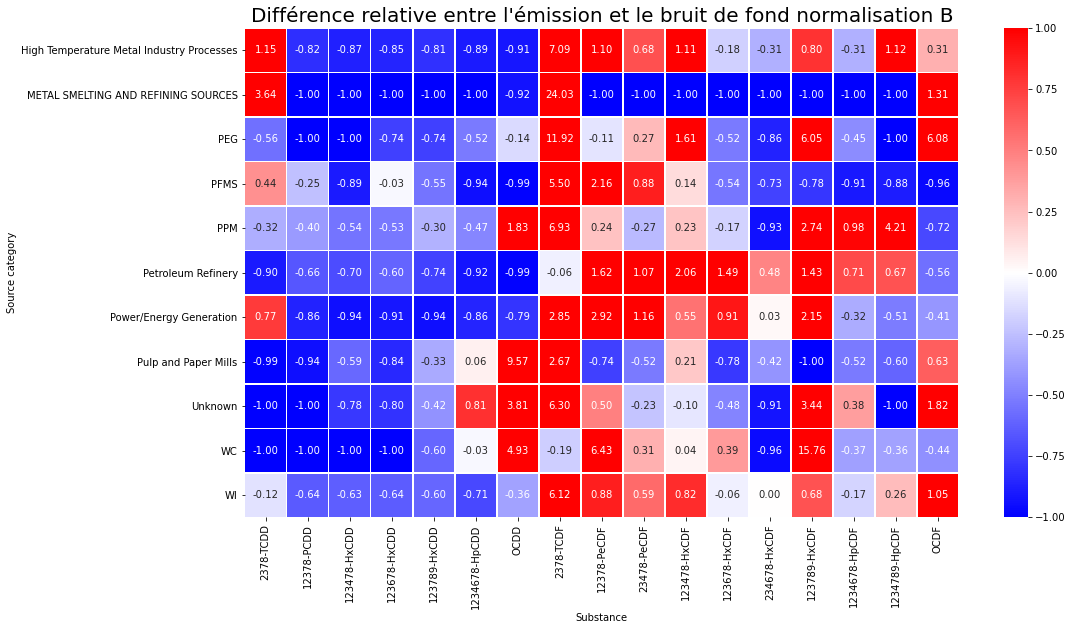

In [44]:
df_methodeB_boxplot_rapport = df_methodeB_boxplot_diff/list_ref
f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Différence relative entre l'émission et le bruit de fond normalisation B",fontsize=20)
sns.heatmap(df_methodeB_boxplot_rapport, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.bwr, vmax = 1, vmin = -1)

### IV.b.4 Affichage par "source subcategory"

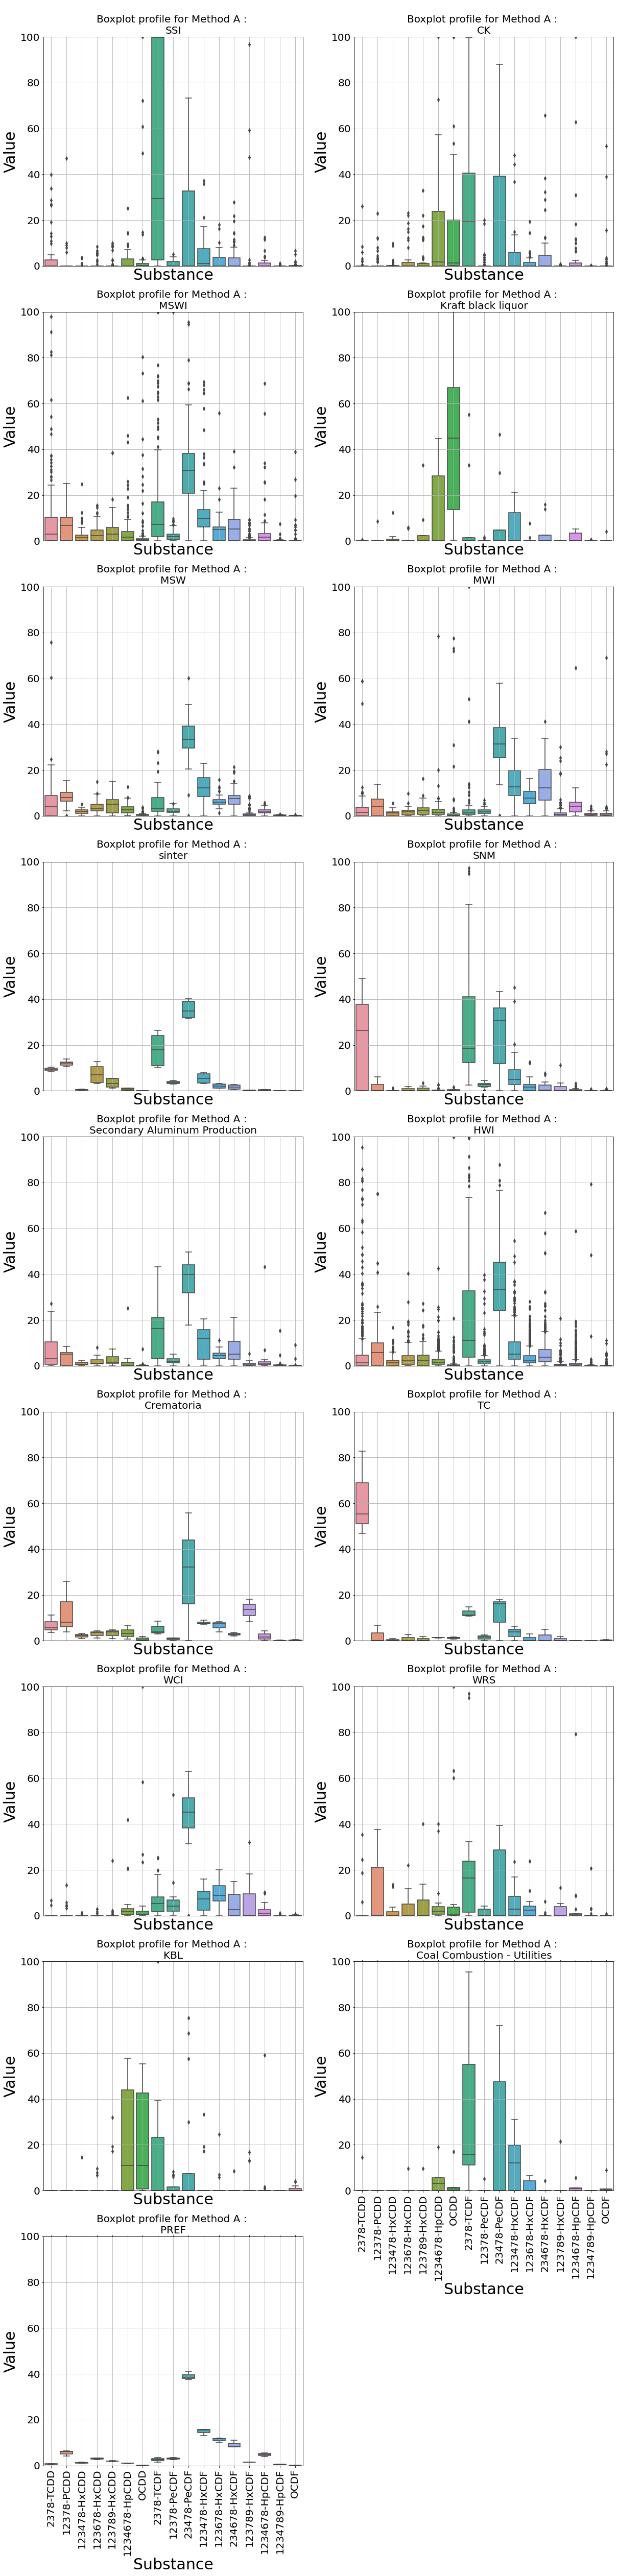

In [45]:
f = plt.figure(figsize=(20,87.5))
X='Substance'
Y='Value'

for (j, test_subcategorie) in enumerate(subcategories):
    n = len(substances)
    df_methodeB_boxplot = pd.DataFrame(columns=['File', 'Date', 'Run id', 'Source category', 'Source subcategory', 'Substance', 'Value'])
    samples_list = []
    for sample in echantillons:
        if test_subcategorie in sample:
            samples_list.append(sample)
    for (k, sample) in enumerate(samples_list):
        data_extract = table_norme_B.loc[sample]
        for (i ,sub) in enumerate(substances):
            row = list(sample)
            row += [sub, data_extract[sub]]
            df_methodeB_boxplot.loc[k*n + i] = row
            
    ax = f.add_subplot(9,2, j+1)
    plt.title("\nBoxplot profile for Method A : \n" + test_subcategorie, fontsize=20)
    ax = sns.boxplot(x=X, y=Y, data=df_methodeB_boxplot)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    if j==15 or j==16:
        plt.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True)
    ax.set_xlabel(X, fontsize = 30)
    ax.set_ylabel(Y, fontsize = 30)
    plt.xticks(fontsize = 20, rotation=90)
    plt.yticks(fontsize = 20)
    plt.ylim(0,100)
    plt.grid()

plt.show()

### IV.b.5 Affichage synthétique par "source subcategory"

#### Vision simple

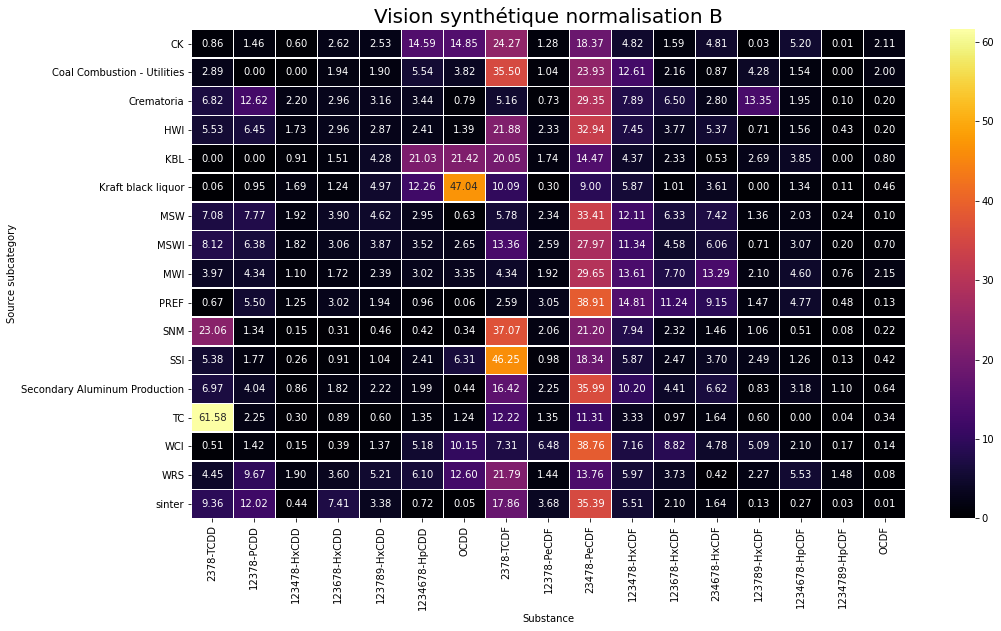

In [46]:
df_methodeB_boxplot_group = df_methodeB_boxplot_total.groupby(["Source subcategory", "Substance"]).mean()
df_methodeB_boxplot_synthese = pd.DataFrame(columns=['Source subcategory', 'Substance', 'Value'])
for (key, value) in enumerate(df_methodeB_boxplot_group["Value"]):
    row = list(df_methodeB_boxplot_group.index[key])
    row.append(value)
    df_methodeB_boxplot_synthese.loc[key] = row
    
df_methodeB_boxplot_synthese = df_methodeB_boxplot_synthese.pivot("Source subcategory", "Substance", "Value")
df_methodeB_boxplot_synthese = df_methodeB_boxplot_synthese.reindex(substances, axis = 1)

f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Vision synthétique normalisation B",fontsize=20)
sns.heatmap(df_methodeB_boxplot_synthese, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.inferno)

#### Vision bornée

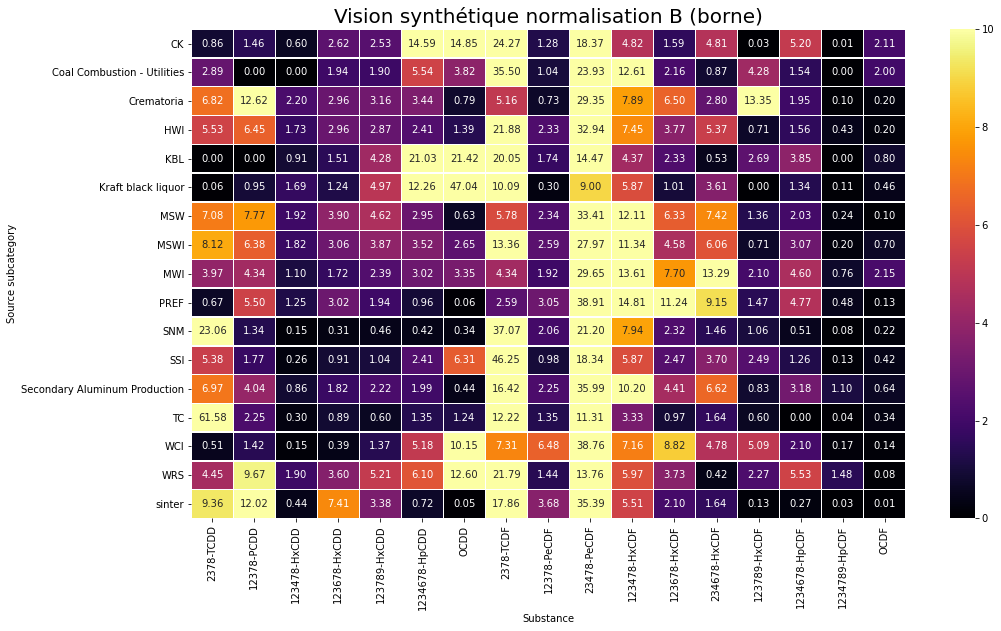

In [47]:
cap = 10
f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Vision synthétique normalisation B (borne)",fontsize=20)
sns.heatmap(df_methodeB_boxplot_synthese, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.inferno, vmax = cap)

#### Vision logarithmique

C:\Users\dsamy\Anaconda3\envs\ineris\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


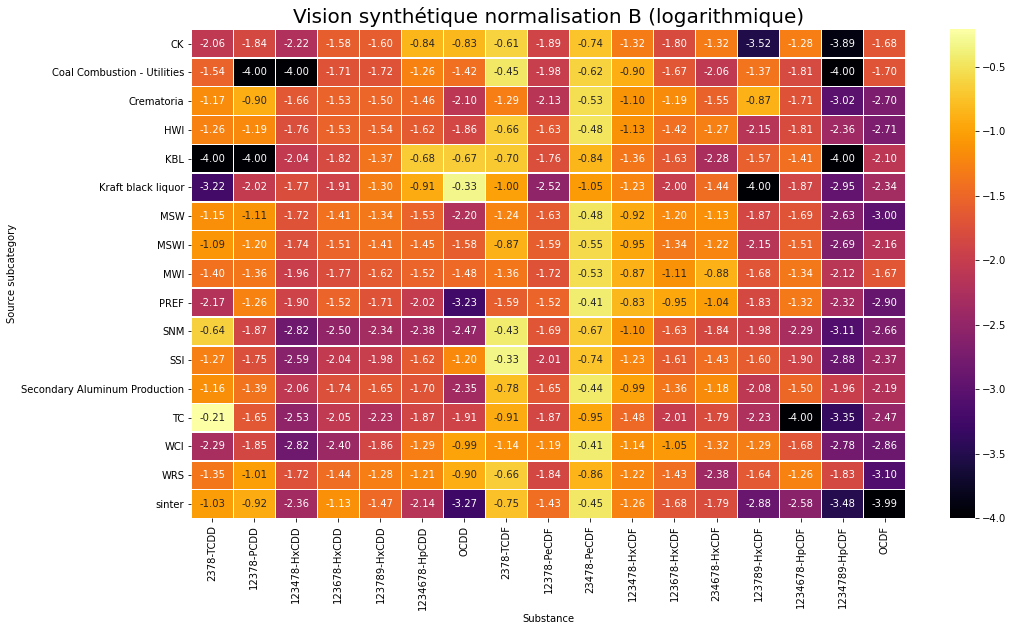

In [48]:
df_methodeB_boxplot_synthese_log = np.log10(df_methodeB_boxplot_synthese / 100)
df_methodeB_boxplot_synthese_log = df_methodeB_boxplot_synthese_log.replace(-np.inf, np.inf)
df_methodeB_boxplot_synthese_log = df_methodeB_boxplot_synthese_log.replace(np.inf, np.floor(np.min(df_methodeB_boxplot_synthese_log.values)))
f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Vision synthétique normalisation B (logarithmique)",fontsize=20)
sns.heatmap(df_methodeB_boxplot_synthese_log, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.inferno)

#### Différence brute entre l'émission et le bruit de fond

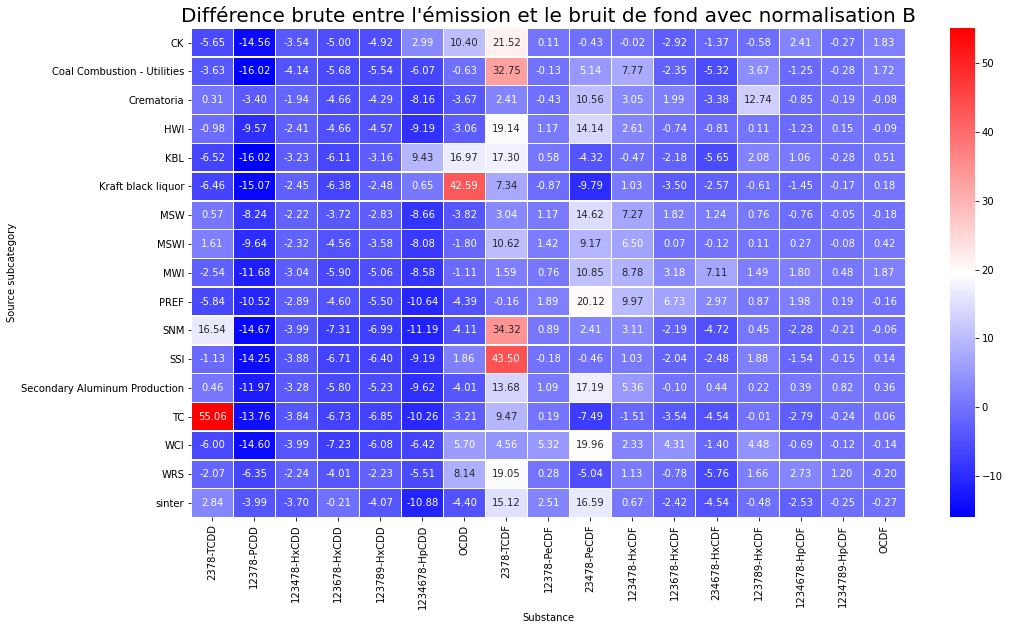

In [49]:
df_methodeB_boxplot_diff = df_methodeB_boxplot_synthese - list_ref

f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Différence brute entre l'émission et le bruit de fond avec normalisation B",fontsize=20)
sns.heatmap(df_methodeB_boxplot_diff, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.bwr)

#### Différence brute entre l'émission et le bruit de fond (bornée)

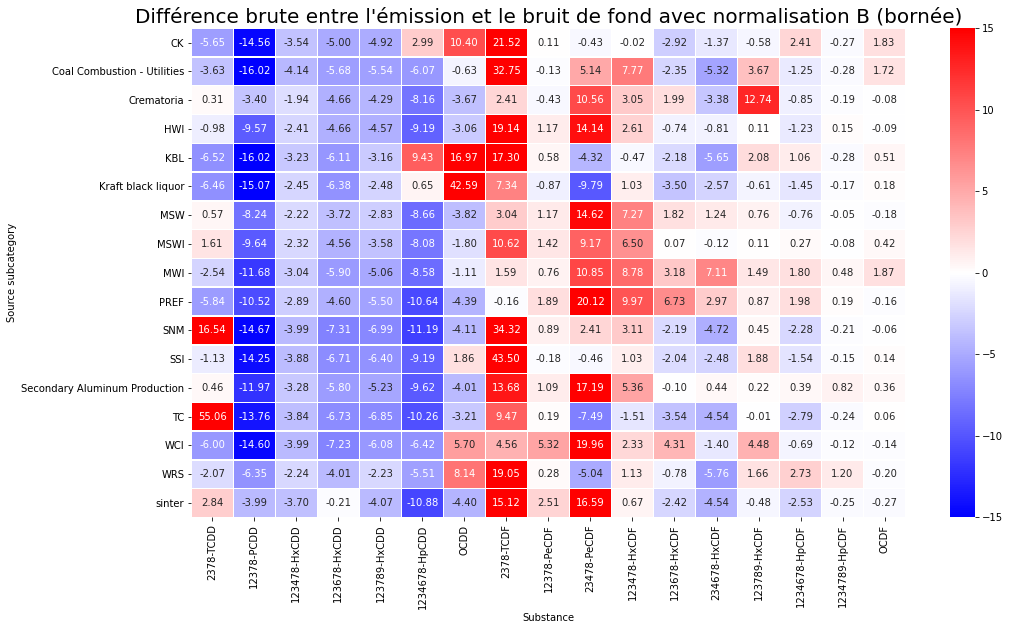

In [50]:
cap = 15
f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Différence brute entre l'émission et le bruit de fond avec normalisation B (bornée)",fontsize=20)
sns.heatmap(df_methodeB_boxplot_diff, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.bwr, vmax = cap, vmin = -cap)

#### Différence relative entre l'émission et le bruit de fond

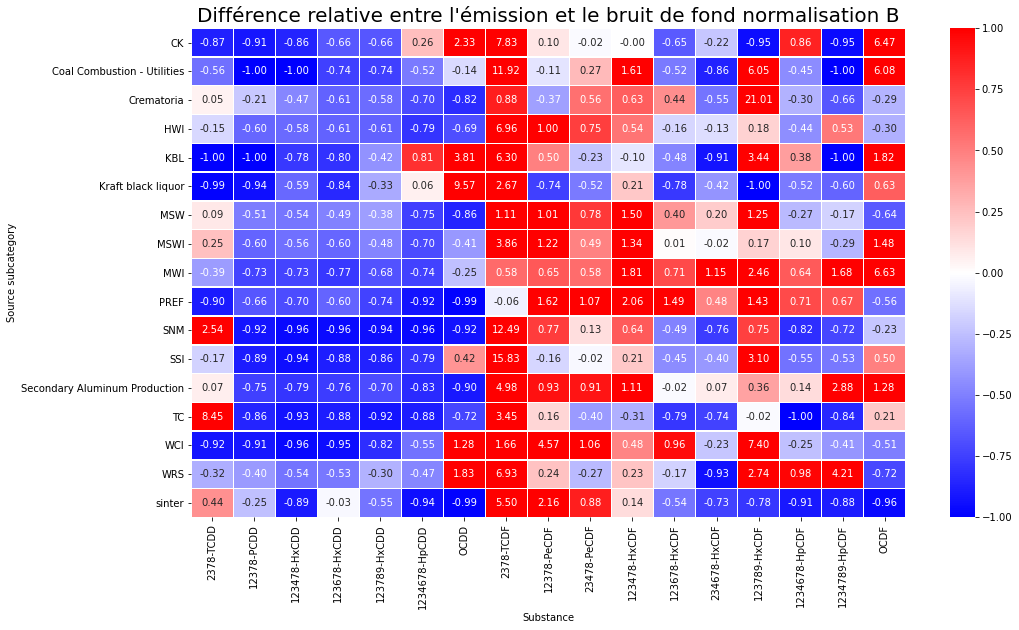

In [51]:
df_methodeB_boxplot_rapport = df_methodeB_boxplot_diff/list_ref
f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Différence relative entre l'émission et le bruit de fond normalisation B",fontsize=20)
sns.heatmap(df_methodeB_boxplot_rapport, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.bwr, vmax = 1, vmin = -1)

### IV.c Norme C

In [52]:
for col in total_homologue:
    table_final["total homologue"] = 0
    table_final["total homologue"] += table_final[col]
table_norme_C = table_final[table_final["total homologue"] > 0]
print("Nombres d'échantillons restants :", len(table_norme_C), "\nPourcentage restant :", len(table_norme_C)*100/len(echantillons))

Nombres d'échantillons restants : 885 
Pourcentage restant : 68.7111801242236


In [53]:
substance_in = {}
for homologue in total_homologue:
    list_sub = []
    text_ref_homologue = homologue.replace("Total ", "")
    table_norme_C[text_ref_homologue] = 0
    for sub in substances:
        if sub.find(text_ref_homologue) != -1:
            list_sub.append(sub)
            table_norme_C[text_ref_homologue] += table_norme_C[sub]
    substance_in[homologue] = list_sub
    table_norme_C = table_norme_C[table_norme_C[text_ref_homologue] <= table_norme_C[homologue]]
print("Nombres d'échantillons restants :", len(table_norme_C), "\nPourcentage restant :", len(table_norme_C)*100/len(echantillons))

Nombres d'échantillons restants : 285 
Pourcentage restant : 22.127329192546583


C:\Users\dsamy\Anaconda3\envs\ineris\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\dsamy\Anaconda3\envs\ineris\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [54]:
for homologue in total_homologue:
    table_norme_C[text_ref_homologue] = 0
    for sub in substance_in[homologue]:
        if sub == 'OCDD':
            table_norme_C[sub] = table_norme_C[sub] *100 / table_norme_C['Total DIOXINE']
        elif sub == 'OCDF':
            table_norme_C[sub] = table_norme_C[sub] *100 / table_norme_C['Total FURANE']
        else:
            table_norme_C[sub] = table_norme_C[sub] *100 / table_norme_C[homologue]
table_norme_C = table_norme_C.fillna(0)
table_norme_C = table_norme_C.replace(np.inf, 0)
table_norme_C_aux = table_norme_C
table_norme_C = table_norme_C[substances]

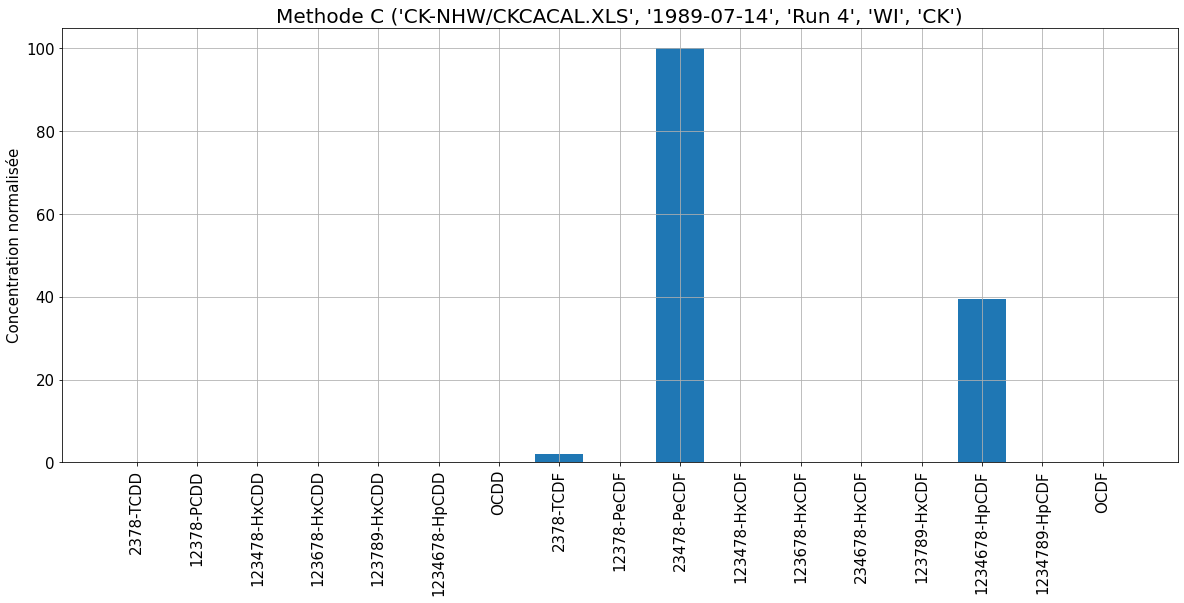

In [55]:
echantillons_C = table_norme_C.index
test = echantillons_C[0]
plt.rcParams["figure.figsize"] = (20,8)
plt.bar(substances, table_norme_C.loc[test].values)
plt.title(f"Methode C " + str(test),fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel('Concentration normalisée',fontsize=15)
plt.xticks(fontsize=15,rotation=90)

plt.grid()
plt.show()

## Affichage par "source category"

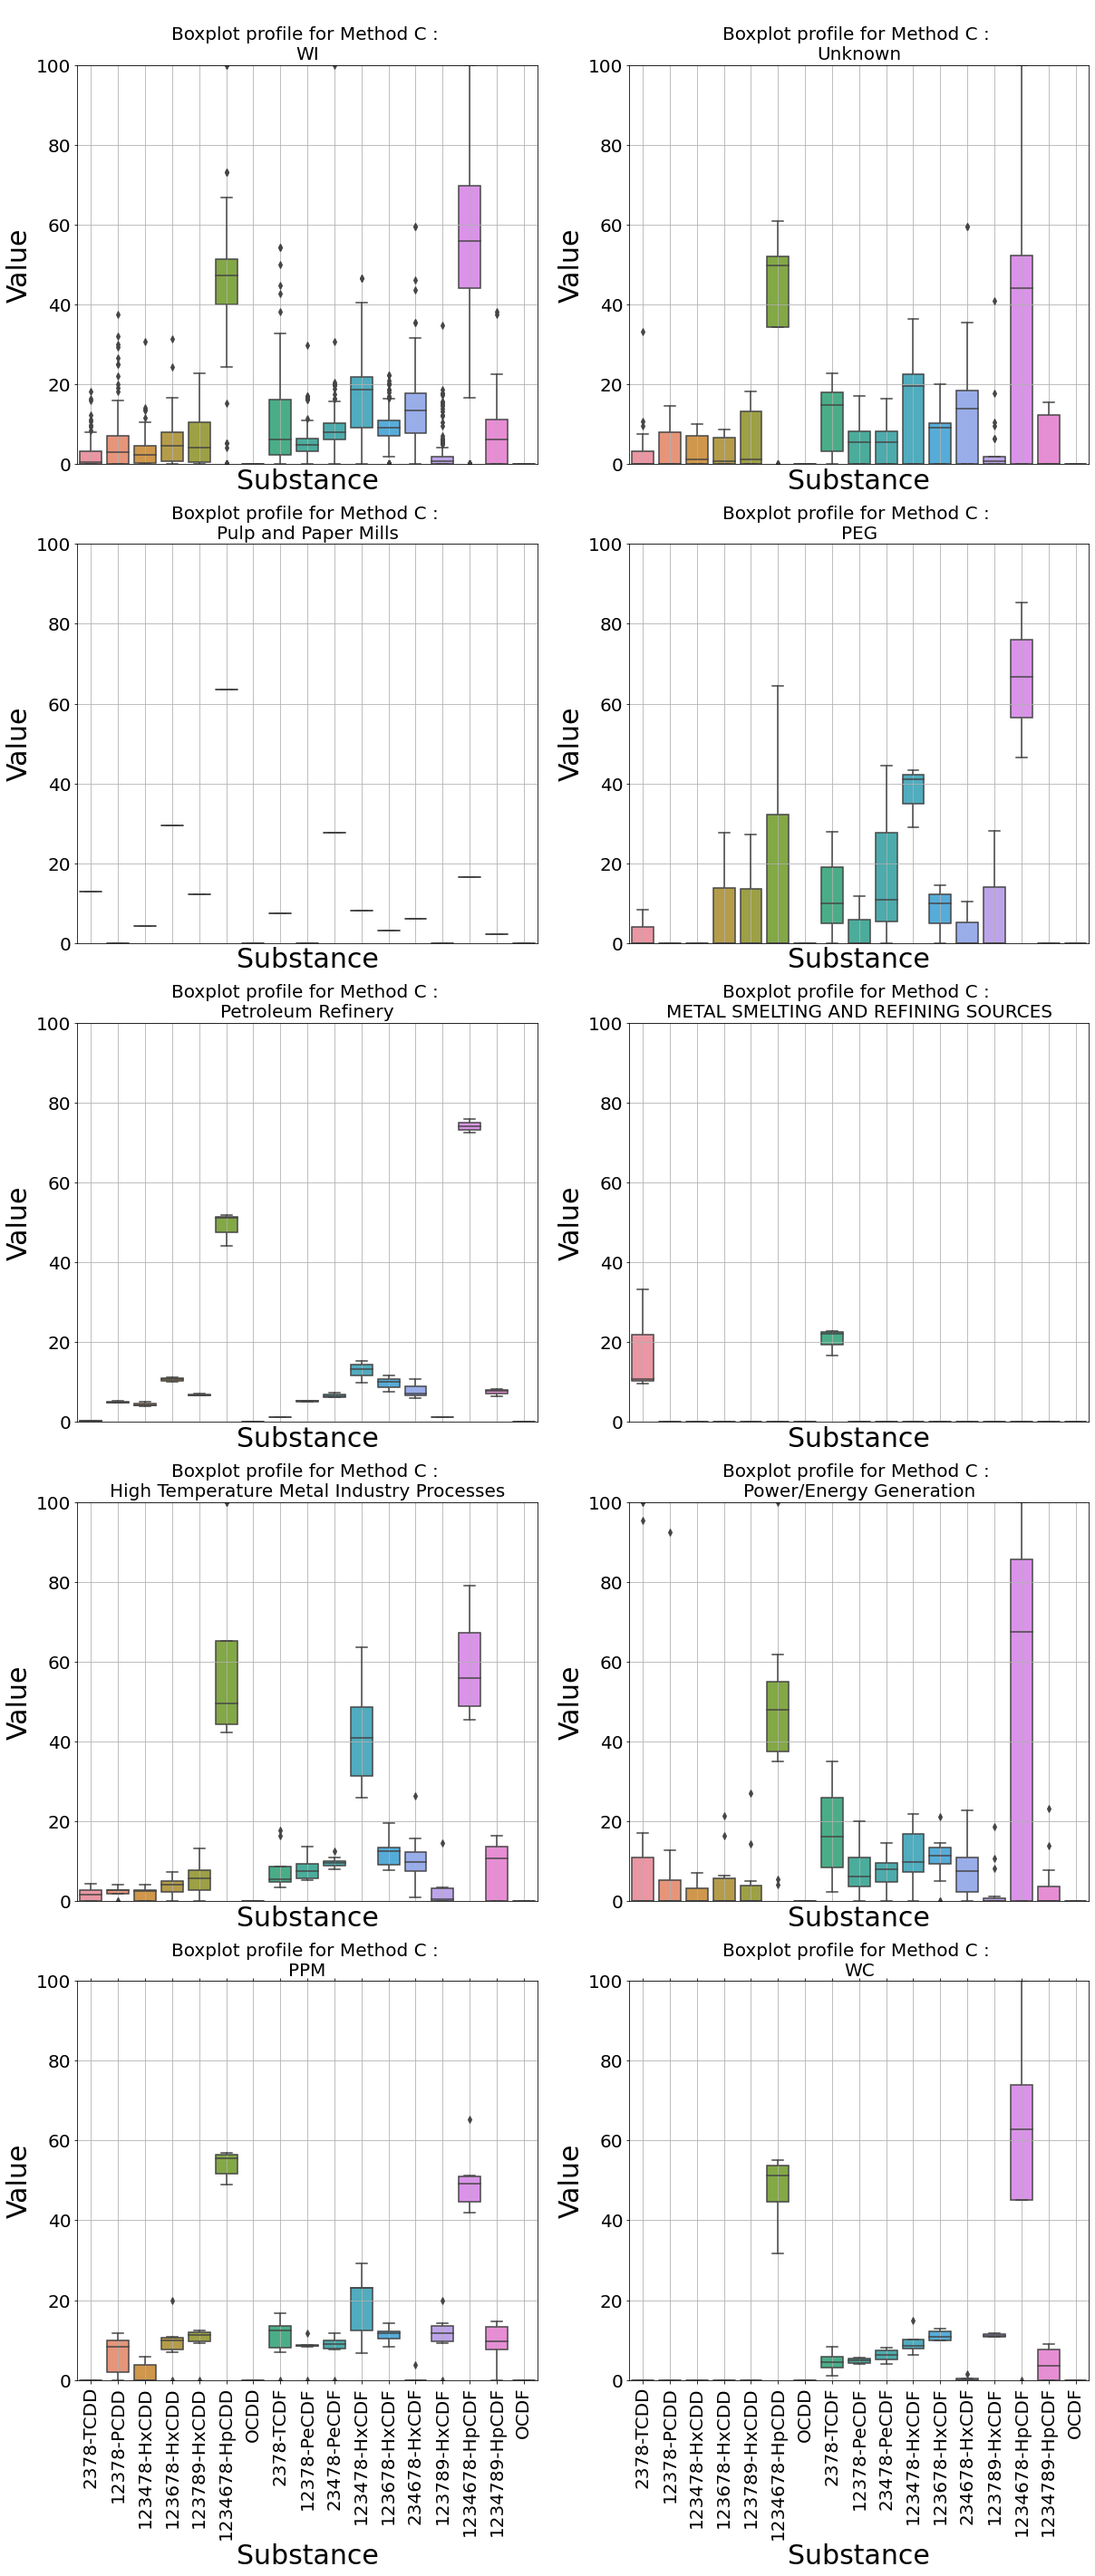

In [56]:
f = plt.figure(figsize=(20,47))
X='Substance'
Y='Value'
df_methodeC_boxplot_total = pd.DataFrame(columns=['File', 'Date', 'Run id', 'Source category', 'Source subcategory', 'Substance', 'Value'])
categories_C = pd.unique([a[3] for a in table_norme_C.index])
for (j, test_categorie) in enumerate(categories_C):
    n = len(substances)
    df_methodeC_boxplot = pd.DataFrame(columns=['File', 'Date', 'Run id', 'Source category', 'Source subcategory', 'Substance', 'Value'])
    samples_list = []
    for sample in echantillons_C:
        if test_categorie in sample:
            samples_list.append(sample)
    for (k, sample) in enumerate(samples_list):
        data_extract = table_norme_C.loc[sample]
        for (i ,sub) in enumerate(substances):
            row = list(sample)
            row += [sub, data_extract[sub]]
            df_methodeC_boxplot.loc[k*n + i] = row
    df_methodeC_boxplot_total = df_methodeC_boxplot_total.append(df_methodeC_boxplot)
            
    ax = f.add_subplot(5,2, j+1)
    plt.title("\nBoxplot profile for Method C : \n" + test_categorie, fontsize=20)
    ax = sns.boxplot(x=X, y=Y, data=df_methodeC_boxplot)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    if j==8 or j==9:
        plt.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True)
    ax.set_xlabel(X, fontsize = 30)
    ax.set_ylabel(Y, fontsize = 30)
    plt.xticks(fontsize = 20, rotation=90)
    plt.yticks(fontsize = 20)
    plt.ylim(0,100)
    plt.grid()

plt.show()

## Préparation des données

No handles with labels found to put in legend.


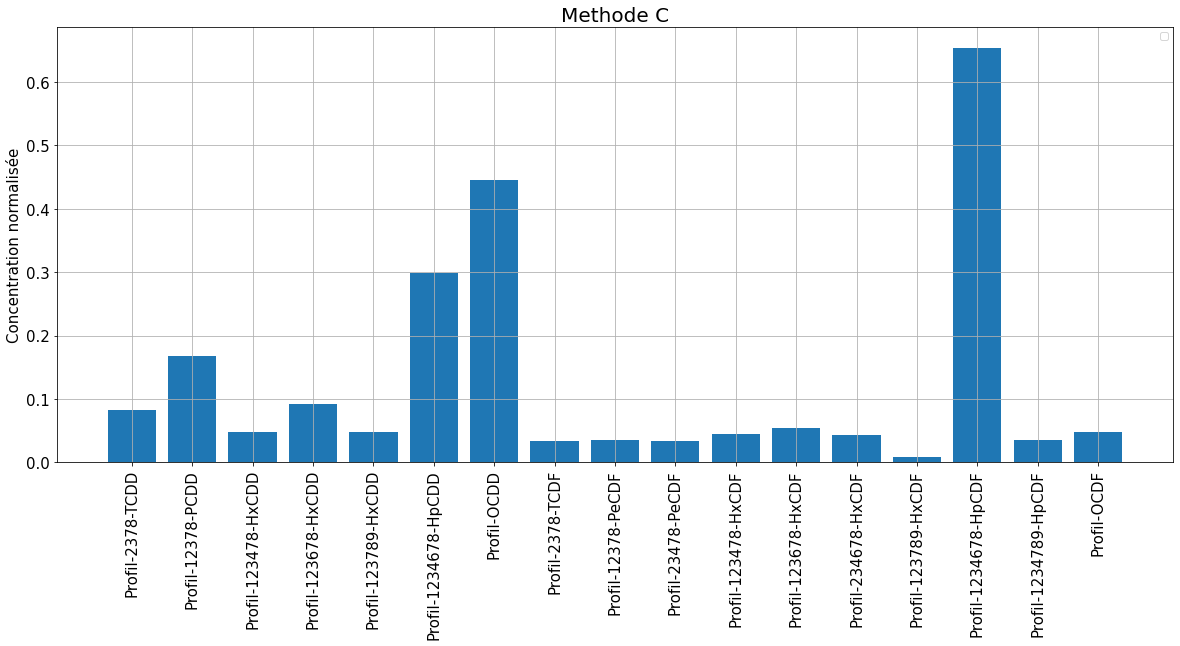

In [57]:
total_list = ['Total TCDF', 'Total TCDD', 'Total PeCDF', 'Total PeCDD', 'Total HxCDF', 'Total HxCDD', 'Total HpCDF', 'Total HpCDD']
df_methodeC = df.copy()

Total = ['Total TCDD','Total PeCDD','Total HxCDD','Total HpCDD','OCDD',
         'Total TCDF','Total PeCDF','Total HxCDF','Total HpCDF','OCDF']
congeneres = ['2378-TCDD', '123478-HxCDD', '123678-HxCDD',
       '123789-HxCDD', '1234678-HpCDD', '2378-TCDF', '12378-PeCDF',
       '23478-PeCDF', '123478-HxCDF', '123678-HxCDF', '234678-HxCDF',
       '123789-HxCDF', '1234678-HpCDF', '1234789-HpCDF']

for total in total_list:
    df_methodeC = df_methodeC[df_methodeC[total] > 0]
for i in congeneres:
    tot = [j for j in Total if j[-4:]==i[-4:]][0]
    df_methodeC = df_methodeC[df_methodeC[i] < df_methodeC[tot]]

df_methodeC['TOTAL PCDD'] = df_methodeC['Total TCDD']+df_methodeC['Total PeCDD']+df_methodeC['Total HxCDD']+df_methodeC['Total HpCDD']+df_methodeC['OCDD']
df_methodeC['TOTAL PCDF'] = df_methodeC['Total TCDF']+df_methodeC['Total PeCDF']+df_methodeC['Total HxCDF']+df_methodeC['Total HpCDF']+df_methodeC['OCDF'] 

df_methodeC['Profil-12378-PCDD'] = df_methodeC['12378-PCDD']/df_methodeC['Total PeCDD']
df_methodeC['Profil-OCDD'] = df_methodeC['OCDD']/df_methodeC['TOTAL PCDD']
df_methodeC['Profil-OCDF'] = df_methodeC['OCDF']/df_methodeC['TOTAL PCDF']

for i in congeneres:
    tot = [j for j in Total if j[-4:]==i[-4:]][0]
    df_methodeC['Profil-'+i] = df_methodeC[i]/df_methodeC[tot]

df_ordered = df_methodeC[['Profil-2378-TCDD', 'Profil-12378-PCDD', 'Profil-123478-HxCDD',
       'Profil-123678-HxCDD', 'Profil-123789-HxCDD', 'Profil-1234678-HpCDD',
       'Profil-OCDD', 'Profil-2378-TCDF', 'Profil-12378-PeCDF',
       'Profil-23478-PeCDF', 'Profil-123478-HxCDF', 'Profil-123678-HxCDF',
       'Profil-234678-HxCDF', 'Profil-123789-HxCDF', 'Profil-1234678-HpCDF',
       'Profil-1234789-HpCDF', 'Profil-OCDF']]

plt.bar(df_ordered.columns, df_ordered.values[0])

plt.title(f"Methode C",fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel('Concentration normalisée',fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.rcParams["figure.figsize"] = (20,8)

plt.legend()
plt.grid()
plt.show()

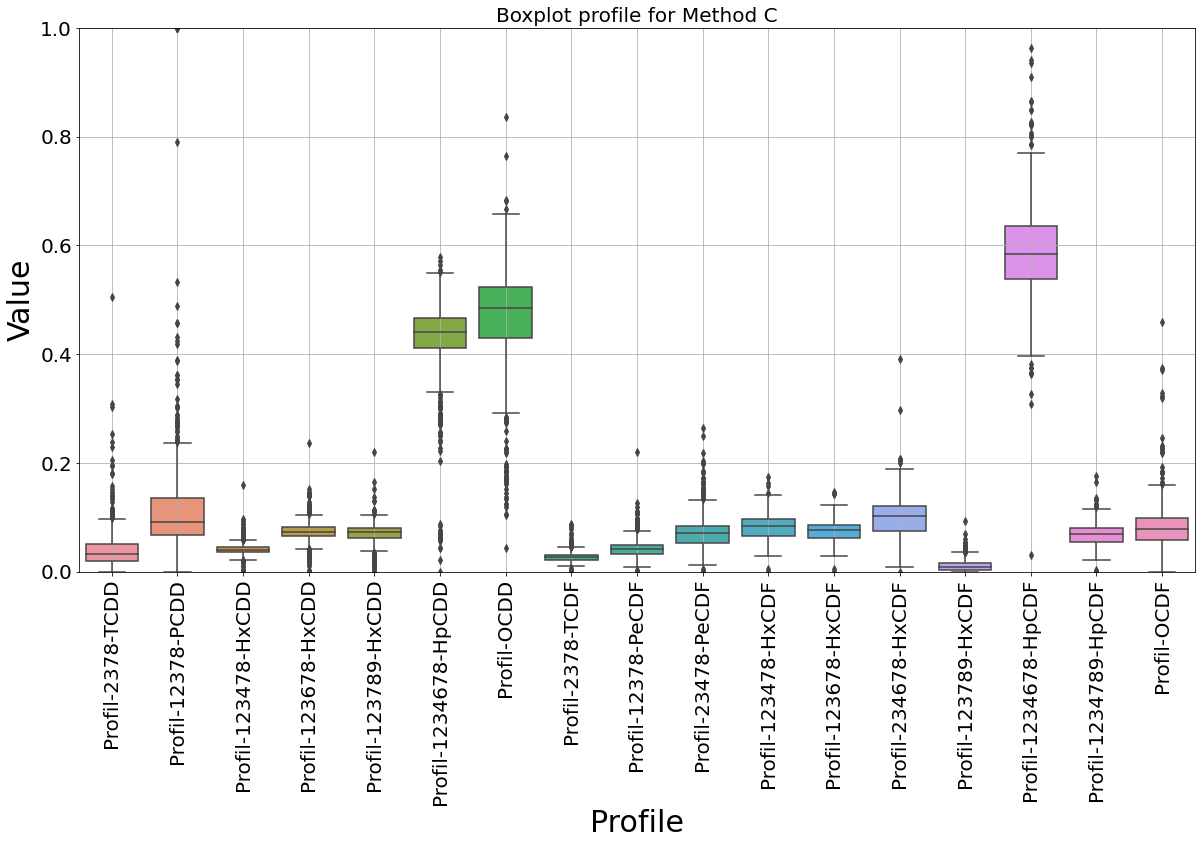

In [58]:
df_ordered_all = df_methodeC[['Site', 'Type', 'Site #', 'Moment', 'Dates', 'Year', 'Season', 'Profil-2378-TCDD', 'Profil-12378-PCDD', 'Profil-123478-HxCDD',
       'Profil-123678-HxCDD', 'Profil-123789-HxCDD', 'Profil-1234678-HpCDD',
       'Profil-OCDD', 'Profil-2378-TCDF', 'Profil-12378-PeCDF',
       'Profil-23478-PeCDF', 'Profil-123478-HxCDF', 'Profil-123678-HxCDF',
       'Profil-234678-HxCDF', 'Profil-123789-HxCDF', 'Profil-1234678-HpCDF',
       'Profil-1234789-HpCDF', 'Profil-OCDF']]

Profiles = ['Profil-2378-TCDD', 'Profil-12378-PCDD',
       'Profil-123478-HxCDD', 'Profil-123678-HxCDD', 'Profil-123789-HxCDD',
       'Profil-1234678-HpCDD', 'Profil-OCDD', 'Profil-2378-TCDF',
       'Profil-12378-PeCDF', 'Profil-23478-PeCDF', 'Profil-123478-HxCDF',
       'Profil-123678-HxCDF', 'Profil-234678-HxCDF', 'Profil-123789-HxCDF',
       'Profil-1234678-HpCDF', 'Profil-1234789-HpCDF', 'Profil-OCDF']
df_methodeC_boxplot = pd.DataFrame(columns=['Site', 'Type', 'Site #', 'Moment', 'Dates', 'Year', 'Season', 'Profile', 'Value'])


for i in range(len(df_methodeC)):
    for j,p in enumerate(Profiles):
        df_methodeC_boxplot.loc[i*17+j] = list(df_ordered_all.values[i][:7]) + [p,df_ordered_all.values[i][j+7]]
        
        
PRO = ['Profil-2378-TCDD', 'Profil-12378-PCDD',
       'Profil-123478-HxCDD', 'Profil-123678-HxCDD', 'Profil-123789-HxCDD',
       'Profil-1234678-HpCDD', 'Profil-OCDD', 'Profil-2378-TCDF',
       'Profil-12378-PeCDF', 'Profil-23478-PeCDF', 'Profil-123478-HxCDF',
       'Profil-123678-HxCDF', 'Profil-234678-HxCDF', 'Profil-123789-HxCDF',
       'Profil-1234678-HpCDF', 'Profil-1234789-HpCDF', 'Profil-OCDF']
df_methodeC_boxplot_ = df_methodeC_boxplot[df_methodeC_boxplot['Profile'].isin(PRO)]
X='Profile'
Y='Value'


plt.figure(figsize = (20, 10))
plt.title("Boxplot profile for Method C",fontsize=20)
ax = sns.boxplot(x=X, y=Y, data=df_methodeC_boxplot_)
ax.set_xlabel(X, fontsize = 30)
ax.set_ylabel(Y, fontsize = 30)
# plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(fontsize = 20, rotation=90)
plt.yticks(fontsize = 20)
plt.ylim(0,1)
plt.grid()

plt.show()

### IV.c.3 Affichage synthétique par "source category"

#### Vision simple

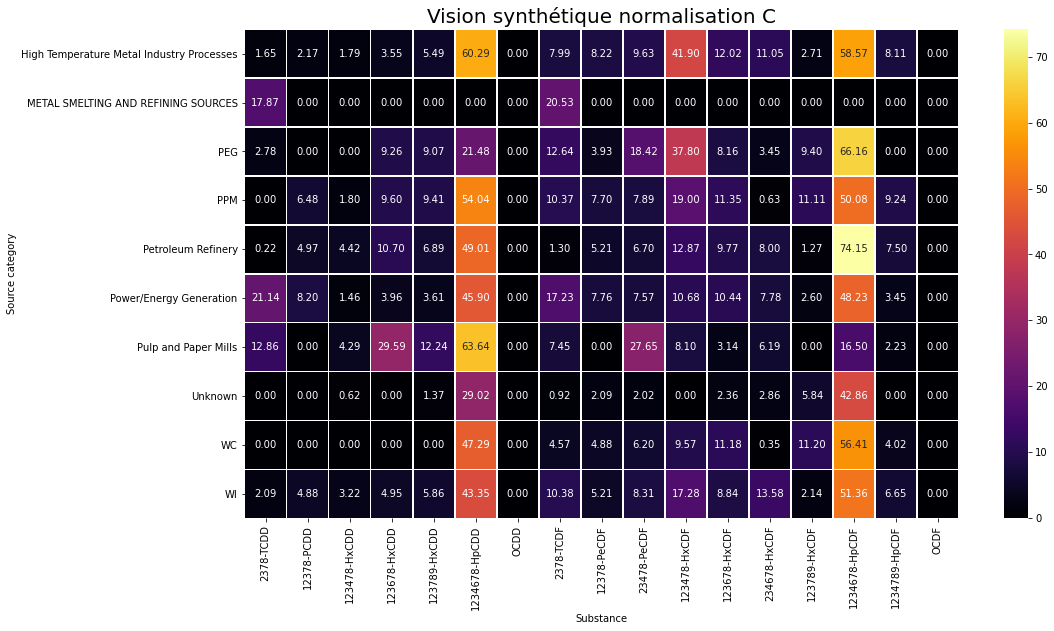

In [59]:
df_methodeC_boxplot_group = df_methodeC_boxplot_total.groupby(["Source category", "Substance"]).mean()
df_methodeC_boxplot_synthese = pd.DataFrame(columns=['Source category', 'Substance', 'Value'])
for (key, value) in enumerate(df_methodeC_boxplot_group["Value"]):
    row = list(df_methodeC_boxplot_group.index[key])
    row.append(value)
    df_methodeC_boxplot_synthese.loc[key] = row
    
df_methodeC_boxplot_synthese = df_methodeC_boxplot_synthese.pivot("Source category", "Substance", "Value")
df_methodeC_boxplot_synthese = df_methodeC_boxplot_synthese.reindex(substances, axis = 1)

f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Vision synthétique normalisation C",fontsize=20)
sns.heatmap(df_methodeC_boxplot_synthese, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.inferno)

#### Vision bornée

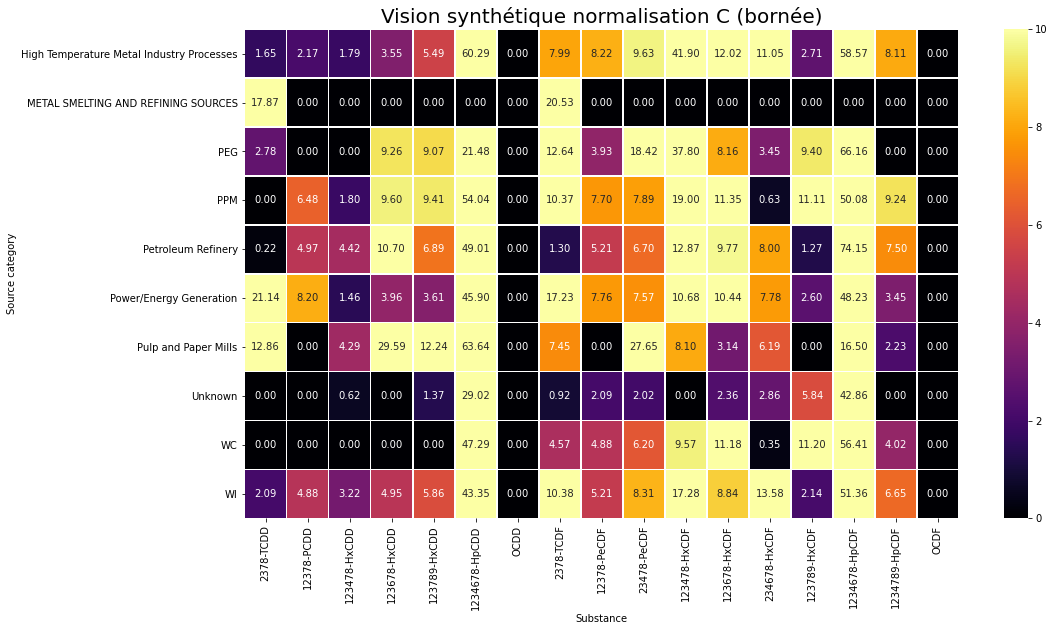

In [60]:
cap = 10
f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Vision synthétique normalisation C (bornée)",fontsize=20)
sns.heatmap(df_methodeC_boxplot_synthese, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.inferno, vmax = cap)

### Vision logarithmique

C:\Users\dsamy\Anaconda3\envs\ineris\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


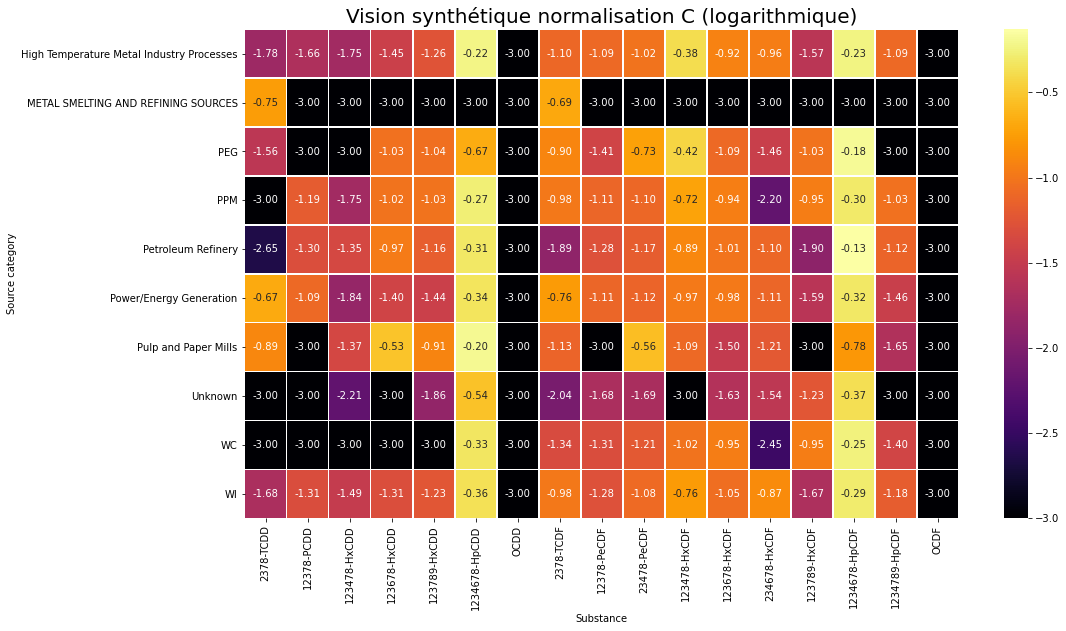

In [61]:
df_methodeC_boxplot_synthese_log = np.log10(df_methodeC_boxplot_synthese / 100)
df_methodeC_boxplot_synthese_log = df_methodeC_boxplot_synthese_log.replace(-np.inf, np.inf)
df_methodeC_boxplot_synthese_log = df_methodeC_boxplot_synthese_log.replace(np.inf, np.floor(np.min(df_methodeC_boxplot_synthese_log.values)))
f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Vision synthétique normalisation C (logarithmique)",fontsize=20)
sns.heatmap(df_methodeC_boxplot_synthese_log, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.inferno)

#### Différence brute entre l'émission et le bruit de fond

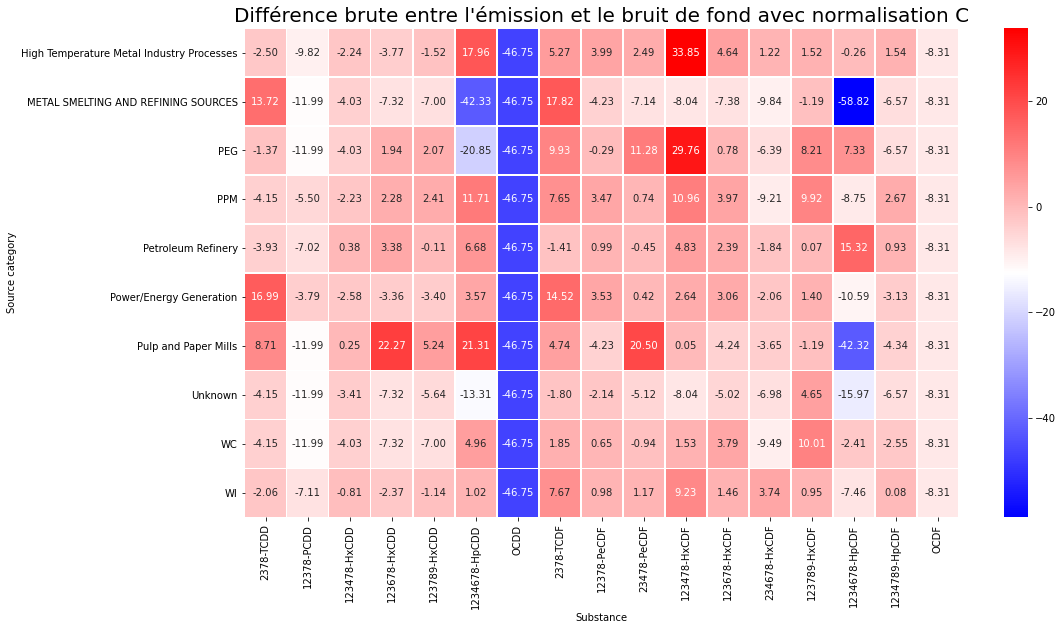

In [62]:
list_ref = df_methodeC_boxplot_[["Profile", "Value"]].groupby("Profile").mean()
list_ref = list_ref.reindex(Profiles, axis = 0)
list_ref = list_ref["Value"].values
df_methodeC_boxplot_diff = df_methodeC_boxplot_synthese - list_ref*100

f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Différence brute entre l'émission et le bruit de fond avec normalisation C",fontsize=20)
sns.heatmap(df_methodeC_boxplot_diff, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.bwr)

#### Différence brute entre l'émission et le bruit de fond (bornée)

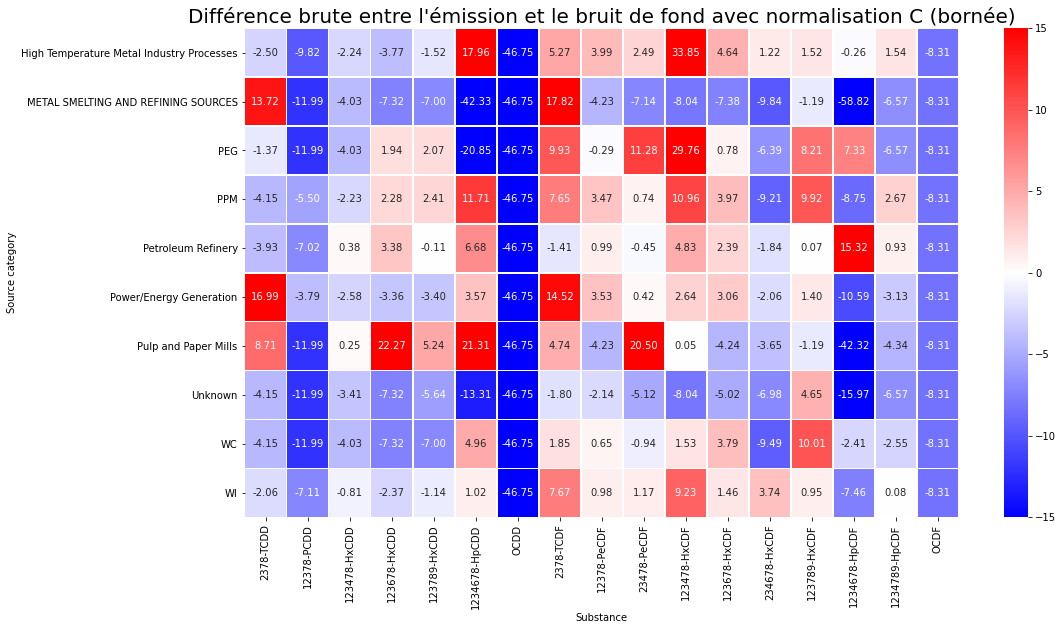

In [63]:
cap = 15
f, ax = plt.subplots(figsize=(16, 9))
plt.title(f"Différence brute entre l'émission et le bruit de fond avec normalisation C (bornée)",fontsize=20)
sns.heatmap(df_methodeC_boxplot_diff, annot=True, fmt="04.2f", linewidths=.5, ax=ax, cmap = plt.cm.bwr, vmax = cap, vmin = -cap)